In [13]:
from tensorflow import keras
import numpy as np
import pandas as pd
import random
import os

dataRep = '../data/'
datasetRep = '../data/dataset/'
trainImageRep = '../data/train_images/'
scriptRep = '../'

#Import the scripts
import sys
sys.path.insert(1, os.path.abspath(scriptRep))
import kuzushiji_recognition as kr

unicodeData = pd.read_csv(dataRep+'unicode_translation.csv')
trainData = pd.read_csv(dataRep+'train.csv')
sampleSubData = pd.read_csv(dataRep+'sample_submission.csv')

In [2]:
testFrac = 0.15
valFrac = 0.15

unicodeData = pd.read_csv(dataRep+'unicode_translation.csv')

raw = np.load(datasetRep + 'SegmentationMapsFull.npz')
image = raw['compressed_images'].copy()
maps = raw['maps'].copy()
del raw

index = np.arange(image.shape[0])
np.random.shuffle(index)
image = (image[index].astype(np.float16)/255.0)
maps = (maps[index].astype(np.float16)/255.0)
del index

nTest = int(image.shape[0]*(1.-testFrac))
nVal = int(image.shape[0]*(1.-testFrac-valFrac))
print(image.shape, maps.shape, image.shape[0], image.shape[1:], nVal, nTest)

(3881, 512, 512, 1) (3881, 512, 512, 2) 3881 (512, 512, 1) 2716 3298


In [4]:
kr.trainAndEvaluateModel(kr.createModelUNet((512,512,1), 0.25, 16), '../models/' + 'Unet1.h5', 1, 
                      image, maps, nVal, nTest, lossFunc='categorical_crossentropy', maxEpochs=75)

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input (InputLayer)              [(None, 512, 512, 1) 0                                            
__________________________________________________________________________________________________
conv1a (Conv2D)                 (None, 512, 512, 16) 160         input[0][0]                      
__________________________________________________________________________________________________
drop1a (SpatialDropout2D)       (None, 512, 512, 16) 0           conv1a[0][0]                     
__________________________________________________________________________________________________
conv1b (Conv2D)                 (None, 512, 512, 16) 2320        drop1a[0][0]                     
____________________________________________________________________________________________

                                                                 conv8a[0][0]                     
__________________________________________________________________________________________________
conv8b (Conv2D)                 (None, 256, 256, 32) 18464       merge8[0][0]                     
__________________________________________________________________________________________________
drop8b (SpatialDropout2D)       (None, 256, 256, 32) 0           conv8b[0][0]                     
__________________________________________________________________________________________________
conv8c (Conv2D)                 (None, 256, 256, 32) 9248        drop8b[0][0]                     
__________________________________________________________________________________________________
drop8c (SpatialDropout2D)       (None, 256, 256, 32) 0           conv8c[0][0]                     
__________________________________________________________________________________________________
conv9a (Co

W0920 14:50:38.575746  3440 callbacks.py:875] `period` argument is deprecated. Please use `save_freq` to specify the frequency in number of samples seen.


Train on 2716 samples, validate on 582 samples


W0920 14:50:38.831201  3440 deprecation.py:323] From C:\Users\bapti\Miniconda3\envs\env\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epoch 1/75


 204/2716 [=>............................] - ETA: 3:25:26 - loss: 1.8200 - acc: 0.04 - ETA: 1:44:31 - loss: 0.9195 - acc: 0.52 - ETA: 1:10:55 - loss: 0.6135 - acc: 0.68 - ETA: 54:06 - loss: 0.4604 - acc: 0.7607 - ETA: 44:04 - loss: 0.3714 - acc: 0.80 - ETA: 37:23 - loss: 0.3158 - acc: 0.83 - ETA: 32:34 - loss: 0.2709 - acc: 0.86 - ETA: 28:57 - loss: 0.2379 - acc: 0.87 - ETA: 26:08 - loss: 0.2122 - acc: 0.89 - ETA: 23:52 - loss: 0.1918 - acc: 0.90 - ETA: 22:01 - loss: 0.1745 - acc: 0.91 - ETA: 20:29 - loss: 0.1614 - acc: 0.91 - ETA: 19:11 - loss: 0.1501 - acc: 0.92 - ETA: 18:04 - loss: 0.1470 - acc: 0.92 - ETA: 17:06 - loss: 0.1384 - acc: 0.93 - ETA: 16:15 - loss: 0.1300 - acc: 0.93 - ETA: 15:31 - loss: 0.1225 - acc: 0.93 - ETA: 14:51 - loss: 0.1160 - acc: 0.94 - ETA: 14:15 - loss: 0.1102 - acc: 0.94 - ETA: 13:44 - loss: 0.1047 - acc: 0.94 - ETA: 13:15 - loss: 0.1002 - acc: 0.95 - ETA: 12:48 - loss: 0.0957 - acc: 0.95 - ETA: 12:24 - loss: 0.0919 - acc: 0.95 - ETA: 12:02 - loss: 0.0886 -

 408/2716 [===>..........................] - ETA: 4:21 - loss: 0.0215 - acc: 0.994 - ETA: 4:20 - loss: 0.0214 - acc: 0.994 - ETA: 4:20 - loss: 0.0214 - acc: 0.994 - ETA: 4:20 - loss: 0.0214 - acc: 0.994 - ETA: 4:19 - loss: 0.0214 - acc: 0.994 - ETA: 4:19 - loss: 0.0213 - acc: 0.994 - ETA: 4:19 - loss: 0.0212 - acc: 0.994 - ETA: 4:18 - loss: 0.0212 - acc: 0.994 - ETA: 4:18 - loss: 0.0212 - acc: 0.994 - ETA: 4:18 - loss: 0.0211 - acc: 0.994 - ETA: 4:17 - loss: 0.0210 - acc: 0.994 - ETA: 4:17 - loss: 0.0210 - acc: 0.994 - ETA: 4:17 - loss: 0.0209 - acc: 0.994 - ETA: 4:16 - loss: 0.0208 - acc: 0.994 - ETA: 4:16 - loss: 0.0208 - acc: 0.994 - ETA: 4:16 - loss: 0.0208 - acc: 0.994 - ETA: 4:15 - loss: 0.0207 - acc: 0.994 - ETA: 4:15 - loss: 0.0207 - acc: 0.994 - ETA: 4:15 - loss: 0.0206 - acc: 0.994 - ETA: 4:14 - loss: 0.0206 - acc: 0.994 - ETA: 4:14 - loss: 0.0206 - acc: 0.994 - ETA: 4:14 - loss: 0.0206 - acc: 0.994 - ETA: 4:13 - loss: 0.0206 - acc: 0.994 - ETA: 4:13 - loss: 0.0205 - acc: 0.9

 612/2716 [=====>........................] - ETA: 3:35 - loss: 0.0185 - acc: 0.995 - ETA: 3:35 - loss: 0.0184 - acc: 0.995 - ETA: 3:35 - loss: 0.0184 - acc: 0.995 - ETA: 3:34 - loss: 0.0184 - acc: 0.995 - ETA: 3:34 - loss: 0.0184 - acc: 0.995 - ETA: 3:34 - loss: 0.0184 - acc: 0.995 - ETA: 3:34 - loss: 0.0187 - acc: 0.995 - ETA: 3:34 - loss: 0.0187 - acc: 0.995 - ETA: 3:34 - loss: 0.0187 - acc: 0.995 - ETA: 3:33 - loss: 0.0187 - acc: 0.995 - ETA: 3:33 - loss: 0.0201 - acc: 0.995 - ETA: 3:33 - loss: 0.0200 - acc: 0.995 - ETA: 3:33 - loss: 0.0200 - acc: 0.995 - ETA: 3:33 - loss: 0.0200 - acc: 0.995 - ETA: 3:33 - loss: 0.0200 - acc: 0.995 - ETA: 3:33 - loss: 0.0200 - acc: 0.995 - ETA: 3:32 - loss: 0.0200 - acc: 0.995 - ETA: 3:32 - loss: 0.0199 - acc: 0.995 - ETA: 3:32 - loss: 0.0199 - acc: 0.995 - ETA: 3:32 - loss: 0.0199 - acc: 0.995 - ETA: 3:32 - loss: 0.0199 - acc: 0.995 - ETA: 3:32 - loss: 0.0199 - acc: 0.995 - ETA: 3:32 - loss: 0.0198 - acc: 0.995 - ETA: 3:31 - loss: 0.0198 - acc: 0.9

 816/2716 [========>.....................] - ETA: 3:09 - loss: 0.0175 - acc: 0.996 - ETA: 3:09 - loss: 0.0175 - acc: 0.996 - ETA: 3:09 - loss: 0.0175 - acc: 0.996 - ETA: 3:08 - loss: 0.0175 - acc: 0.996 - ETA: 3:08 - loss: 0.0174 - acc: 0.996 - ETA: 3:08 - loss: 0.0174 - acc: 0.996 - ETA: 3:08 - loss: 0.0174 - acc: 0.996 - ETA: 3:08 - loss: 0.0174 - acc: 0.996 - ETA: 3:08 - loss: 0.0174 - acc: 0.996 - ETA: 3:08 - loss: 0.0174 - acc: 0.996 - ETA: 3:08 - loss: 0.0174 - acc: 0.996 - ETA: 3:07 - loss: 0.0174 - acc: 0.996 - ETA: 3:07 - loss: 0.0174 - acc: 0.996 - ETA: 3:07 - loss: 0.0174 - acc: 0.996 - ETA: 3:07 - loss: 0.0174 - acc: 0.996 - ETA: 3:07 - loss: 0.0174 - acc: 0.996 - ETA: 3:07 - loss: 0.0173 - acc: 0.996 - ETA: 3:07 - loss: 0.0173 - acc: 0.996 - ETA: 3:07 - loss: 0.0173 - acc: 0.996 - ETA: 3:07 - loss: 0.0173 - acc: 0.996 - ETA: 3:06 - loss: 0.0173 - acc: 0.996 - ETA: 3:06 - loss: 0.0173 - acc: 0.996 - ETA: 3:06 - loss: 0.0173 - acc: 0.996 - ETA: 3:06 - loss: 0.0173 - acc: 0.9

1020/2716 [==========>...................] - ETA: 2:47 - loss: 0.0172 - acc: 0.996 - ETA: 2:47 - loss: 0.0172 - acc: 0.996 - ETA: 2:47 - loss: 0.0172 - acc: 0.996 - ETA: 2:47 - loss: 0.0172 - acc: 0.996 - ETA: 2:47 - loss: 0.0172 - acc: 0.996 - ETA: 2:47 - loss: 0.0172 - acc: 0.996 - ETA: 2:47 - loss: 0.0172 - acc: 0.996 - ETA: 2:47 - loss: 0.0172 - acc: 0.996 - ETA: 2:46 - loss: 0.0172 - acc: 0.996 - ETA: 2:46 - loss: 0.0171 - acc: 0.996 - ETA: 2:46 - loss: 0.0171 - acc: 0.996 - ETA: 2:46 - loss: 0.0171 - acc: 0.996 - ETA: 2:46 - loss: 0.0171 - acc: 0.996 - ETA: 2:46 - loss: 0.0171 - acc: 0.996 - ETA: 2:46 - loss: 0.0171 - acc: 0.996 - ETA: 2:46 - loss: 0.0171 - acc: 0.996 - ETA: 2:46 - loss: 0.0171 - acc: 0.996 - ETA: 2:46 - loss: 0.0171 - acc: 0.996 - ETA: 2:45 - loss: 0.0171 - acc: 0.996 - ETA: 2:45 - loss: 0.0171 - acc: 0.996 - ETA: 2:45 - loss: 0.0171 - acc: 0.996 - ETA: 2:45 - loss: 0.0171 - acc: 0.996 - ETA: 2:45 - loss: 0.0171 - acc: 0.996 - ETA: 2:45 - loss: 0.0170 - acc: 0.9

1224/2716 [============>.................] - ETA: 2:27 - loss: 0.0169 - acc: 0.997 - ETA: 2:27 - loss: 0.0169 - acc: 0.997 - ETA: 2:27 - loss: 0.0169 - acc: 0.997 - ETA: 2:27 - loss: 0.0169 - acc: 0.997 - ETA: 2:27 - loss: 0.0169 - acc: 0.997 - ETA: 2:27 - loss: 0.0169 - acc: 0.997 - ETA: 2:27 - loss: 0.0169 - acc: 0.997 - ETA: 2:27 - loss: 0.0169 - acc: 0.997 - ETA: 2:27 - loss: 0.0169 - acc: 0.997 - ETA: 2:27 - loss: 0.0168 - acc: 0.997 - ETA: 2:27 - loss: 0.0168 - acc: 0.997 - ETA: 2:26 - loss: 0.0168 - acc: 0.997 - ETA: 2:26 - loss: 0.0168 - acc: 0.997 - ETA: 2:26 - loss: 0.0168 - acc: 0.997 - ETA: 2:26 - loss: 0.0168 - acc: 0.997 - ETA: 2:26 - loss: 0.0168 - acc: 0.997 - ETA: 2:26 - loss: 0.0168 - acc: 0.997 - ETA: 2:26 - loss: 0.0168 - acc: 0.997 - ETA: 2:26 - loss: 0.0167 - acc: 0.997 - ETA: 2:26 - loss: 0.0167 - acc: 0.997 - ETA: 2:26 - loss: 0.0167 - acc: 0.997 - ETA: 2:26 - loss: 0.0167 - acc: 0.997 - ETA: 2:25 - loss: 0.0167 - acc: 0.997 - ETA: 2:25 - loss: 0.0167 - acc: 0.9

1428/2716 [==============>...............] - ETA: 2:09 - loss: 0.0159 - acc: 0.997 - ETA: 2:09 - loss: 0.0159 - acc: 0.997 - ETA: 2:09 - loss: 0.0159 - acc: 0.997 - ETA: 2:08 - loss: 0.0159 - acc: 0.997 - ETA: 2:08 - loss: 0.0159 - acc: 0.997 - ETA: 2:08 - loss: 0.0159 - acc: 0.997 - ETA: 2:08 - loss: 0.0159 - acc: 0.997 - ETA: 2:08 - loss: 0.0159 - acc: 0.997 - ETA: 2:08 - loss: 0.0159 - acc: 0.997 - ETA: 2:08 - loss: 0.0159 - acc: 0.997 - ETA: 2:08 - loss: 0.0159 - acc: 0.997 - ETA: 2:08 - loss: 0.0159 - acc: 0.997 - ETA: 2:08 - loss: 0.0158 - acc: 0.997 - ETA: 2:08 - loss: 0.0159 - acc: 0.997 - ETA: 2:07 - loss: 0.0158 - acc: 0.997 - ETA: 2:07 - loss: 0.0158 - acc: 0.997 - ETA: 2:07 - loss: 0.0158 - acc: 0.997 - ETA: 2:07 - loss: 0.0158 - acc: 0.997 - ETA: 2:07 - loss: 0.0158 - acc: 0.997 - ETA: 2:07 - loss: 0.0158 - acc: 0.997 - ETA: 2:07 - loss: 0.0158 - acc: 0.997 - ETA: 2:07 - loss: 0.0158 - acc: 0.997 - ETA: 2:07 - loss: 0.0158 - acc: 0.997 - ETA: 2:07 - loss: 0.0158 - acc: 0.9

1632/2716 [=================>............] - ETA: 1:50 - loss: 0.0153 - acc: 0.998 - ETA: 1:50 - loss: 0.0153 - acc: 0.998 - ETA: 1:50 - loss: 0.0153 - acc: 0.998 - ETA: 1:50 - loss: 0.0153 - acc: 0.998 - ETA: 1:50 - loss: 0.0153 - acc: 0.998 - ETA: 1:50 - loss: 0.0153 - acc: 0.998 - ETA: 1:50 - loss: 0.0153 - acc: 0.998 - ETA: 1:50 - loss: 0.0153 - acc: 0.998 - ETA: 1:50 - loss: 0.0153 - acc: 0.998 - ETA: 1:50 - loss: 0.0153 - acc: 0.998 - ETA: 1:50 - loss: 0.0153 - acc: 0.998 - ETA: 1:49 - loss: 0.0153 - acc: 0.998 - ETA: 1:49 - loss: 0.0153 - acc: 0.998 - ETA: 1:49 - loss: 0.0153 - acc: 0.998 - ETA: 1:49 - loss: 0.0153 - acc: 0.998 - ETA: 1:49 - loss: 0.0153 - acc: 0.998 - ETA: 1:49 - loss: 0.0153 - acc: 0.998 - ETA: 1:49 - loss: 0.0153 - acc: 0.998 - ETA: 1:49 - loss: 0.0153 - acc: 0.998 - ETA: 1:49 - loss: 0.0153 - acc: 0.998 - ETA: 1:49 - loss: 0.0152 - acc: 0.998 - ETA: 1:49 - loss: 0.0153 - acc: 0.998 - ETA: 1:49 - loss: 0.0153 - acc: 0.998 - ETA: 1:48 - loss: 0.0153 - acc: 0.9

1836/2716 [===================>..........] - ETA: 1:33 - loss: 0.0147 - acc: 0.998 - ETA: 1:32 - loss: 0.0148 - acc: 0.998 - ETA: 1:32 - loss: 0.0147 - acc: 0.998 - ETA: 1:32 - loss: 0.0147 - acc: 0.998 - ETA: 1:32 - loss: 0.0147 - acc: 0.998 - ETA: 1:32 - loss: 0.0147 - acc: 0.998 - ETA: 1:32 - loss: 0.0147 - acc: 0.998 - ETA: 1:32 - loss: 0.0147 - acc: 0.998 - ETA: 1:32 - loss: 0.0147 - acc: 0.998 - ETA: 1:32 - loss: 0.0147 - acc: 0.998 - ETA: 1:32 - loss: 0.0147 - acc: 0.998 - ETA: 1:32 - loss: 0.0147 - acc: 0.998 - ETA: 1:31 - loss: 0.0147 - acc: 0.998 - ETA: 1:31 - loss: 0.0147 - acc: 0.998 - ETA: 1:31 - loss: 0.0147 - acc: 0.998 - ETA: 1:31 - loss: 0.0147 - acc: 0.998 - ETA: 1:31 - loss: 0.0147 - acc: 0.998 - ETA: 1:31 - loss: 0.0147 - acc: 0.998 - ETA: 1:31 - loss: 0.0147 - acc: 0.998 - ETA: 1:31 - loss: 0.0147 - acc: 0.998 - ETA: 1:31 - loss: 0.0147 - acc: 0.998 - ETA: 1:31 - loss: 0.0147 - acc: 0.998 - ETA: 1:31 - loss: 0.0147 - acc: 0.998 - ETA: 1:30 - loss: 0.0147 - acc: 0.9

2042/2716 [=====================>........] - ETA: 1:15 - loss: 0.0145 - acc: 0.998 - ETA: 1:15 - loss: 0.0145 - acc: 0.998 - ETA: 1:15 - loss: 0.0145 - acc: 0.998 - ETA: 1:15 - loss: 0.0145 - acc: 0.998 - ETA: 1:14 - loss: 0.0145 - acc: 0.998 - ETA: 1:14 - loss: 0.0145 - acc: 0.998 - ETA: 1:14 - loss: 0.0145 - acc: 0.998 - ETA: 1:14 - loss: 0.0145 - acc: 0.998 - ETA: 1:14 - loss: 0.0145 - acc: 0.998 - ETA: 1:14 - loss: 0.0145 - acc: 0.998 - ETA: 1:14 - loss: 0.0145 - acc: 0.998 - ETA: 1:14 - loss: 0.0145 - acc: 0.998 - ETA: 1:14 - loss: 0.0145 - acc: 0.998 - ETA: 1:14 - loss: 0.0145 - acc: 0.998 - ETA: 1:14 - loss: 0.0145 - acc: 0.998 - ETA: 1:13 - loss: 0.0145 - acc: 0.998 - ETA: 1:13 - loss: 0.0145 - acc: 0.998 - ETA: 1:13 - loss: 0.0145 - acc: 0.998 - ETA: 1:13 - loss: 0.0145 - acc: 0.998 - ETA: 1:13 - loss: 0.0145 - acc: 0.998 - ETA: 1:13 - loss: 0.0145 - acc: 0.998 - ETA: 1:13 - loss: 0.0145 - acc: 0.998 - ETA: 1:13 - loss: 0.0145 - acc: 0.998 - ETA: 1:13 - loss: 0.0145 - acc: 0.9

2257/2716 [=======================>......] - ETA: 57s - loss: 0.0143 - acc: 0.99 - ETA: 57s - loss: 0.0143 - acc: 0.99 - ETA: 57s - loss: 0.0143 - acc: 0.99 - ETA: 57s - loss: 0.0143 - acc: 0.99 - ETA: 57s - loss: 0.0143 - acc: 0.99 - ETA: 57s - loss: 0.0143 - acc: 0.99 - ETA: 56s - loss: 0.0143 - acc: 0.99 - ETA: 56s - loss: 0.0143 - acc: 0.99 - ETA: 56s - loss: 0.0142 - acc: 0.99 - ETA: 56s - loss: 0.0142 - acc: 0.99 - ETA: 56s - loss: 0.0142 - acc: 0.99 - ETA: 56s - loss: 0.0142 - acc: 0.99 - ETA: 56s - loss: 0.0142 - acc: 0.99 - ETA: 56s - loss: 0.0142 - acc: 0.99 - ETA: 56s - loss: 0.0142 - acc: 0.99 - ETA: 56s - loss: 0.0142 - acc: 0.99 - ETA: 56s - loss: 0.0142 - acc: 0.99 - ETA: 56s - loss: 0.0142 - acc: 0.99 - ETA: 55s - loss: 0.0142 - acc: 0.99 - ETA: 55s - loss: 0.0142 - acc: 0.99 - ETA: 55s - loss: 0.0142 - acc: 0.99 - ETA: 55s - loss: 0.0142 - acc: 0.99 - ETA: 55s - loss: 0.0142 - acc: 0.99 - ETA: 55s - loss: 0.0142 - acc: 0.99 - ETA: 55s - loss: 0.0142 - acc: 0.99 - ETA: 

2472/2716 [==========================>...] - ETA: 39s - loss: 0.0141 - acc: 0.99 - ETA: 38s - loss: 0.0141 - acc: 0.99 - ETA: 38s - loss: 0.0141 - acc: 0.99 - ETA: 38s - loss: 0.0141 - acc: 0.99 - ETA: 38s - loss: 0.0141 - acc: 0.99 - ETA: 38s - loss: 0.0141 - acc: 0.99 - ETA: 38s - loss: 0.0141 - acc: 0.99 - ETA: 38s - loss: 0.0141 - acc: 0.99 - ETA: 38s - loss: 0.0141 - acc: 0.99 - ETA: 38s - loss: 0.0141 - acc: 0.99 - ETA: 38s - loss: 0.0141 - acc: 0.99 - ETA: 38s - loss: 0.0141 - acc: 0.99 - ETA: 38s - loss: 0.0141 - acc: 0.99 - ETA: 37s - loss: 0.0141 - acc: 0.99 - ETA: 37s - loss: 0.0141 - acc: 0.99 - ETA: 37s - loss: 0.0141 - acc: 0.99 - ETA: 37s - loss: 0.0141 - acc: 0.99 - ETA: 37s - loss: 0.0141 - acc: 0.99 - ETA: 37s - loss: 0.0141 - acc: 0.99 - ETA: 37s - loss: 0.0141 - acc: 0.99 - ETA: 37s - loss: 0.0141 - acc: 0.99 - ETA: 37s - loss: 0.0141 - acc: 0.99 - ETA: 37s - loss: 0.0141 - acc: 0.99 - ETA: 37s - loss: 0.0141 - acc: 0.99 - ETA: 36s - loss: 0.0141 - acc: 0.99 - ETA: 

2687/2716 [============================>.] - ETA: 20s - loss: 0.0139 - acc: 0.99 - ETA: 20s - loss: 0.0139 - acc: 0.99 - ETA: 20s - loss: 0.0139 - acc: 0.99 - ETA: 20s - loss: 0.0139 - acc: 0.99 - ETA: 20s - loss: 0.0139 - acc: 0.99 - ETA: 20s - loss: 0.0139 - acc: 0.99 - ETA: 20s - loss: 0.0139 - acc: 0.99 - ETA: 20s - loss: 0.0139 - acc: 0.99 - ETA: 19s - loss: 0.0139 - acc: 0.99 - ETA: 19s - loss: 0.0139 - acc: 0.99 - ETA: 19s - loss: 0.0139 - acc: 0.99 - ETA: 19s - loss: 0.0139 - acc: 0.99 - ETA: 19s - loss: 0.0139 - acc: 0.99 - ETA: 19s - loss: 0.0139 - acc: 0.99 - ETA: 19s - loss: 0.0139 - acc: 0.99 - ETA: 19s - loss: 0.0139 - acc: 0.99 - ETA: 19s - loss: 0.0139 - acc: 0.99 - ETA: 19s - loss: 0.0139 - acc: 0.99 - ETA: 19s - loss: 0.0139 - acc: 0.99 - ETA: 19s - loss: 0.0139 - acc: 0.99 - ETA: 18s - loss: 0.0139 - acc: 0.99 - ETA: 18s - loss: 0.0139 - acc: 0.99 - ETA: 18s - loss: 0.0139 - acc: 0.99 - ETA: 18s - loss: 0.0139 - acc: 0.99 - ETA: 18s - loss: 0.0139 - acc: 0.99 - ETA: 

2716/2716 [==============================] - ETA: 2s - loss: 0.0138 - acc: 0.998 - ETA: 2s - loss: 0.0138 - acc: 0.998 - ETA: 2s - loss: 0.0138 - acc: 0.998 - ETA: 2s - loss: 0.0138 - acc: 0.998 - ETA: 2s - loss: 0.0138 - acc: 0.998 - ETA: 1s - loss: 0.0138 - acc: 0.998 - ETA: 1s - loss: 0.0138 - acc: 0.998 - ETA: 1s - loss: 0.0138 - acc: 0.998 - ETA: 1s - loss: 0.0137 - acc: 0.998 - ETA: 1s - loss: 0.0138 - acc: 0.998 - ETA: 1s - loss: 0.0137 - acc: 0.998 - ETA: 1s - loss: 0.0138 - acc: 0.998 - ETA: 1s - loss: 0.0137 - acc: 0.998 - ETA: 1s - loss: 0.0138 - acc: 0.998 - ETA: 1s - loss: 0.0138 - acc: 0.998 - ETA: 1s - loss: 0.0138 - acc: 0.998 - ETA: 1s - loss: 0.0138 - acc: 0.998 - ETA: 0s - loss: 0.0137 - acc: 0.998 - ETA: 0s - loss: 0.0138 - acc: 0.998 - ETA: 0s - loss: 0.0138 - acc: 0.998 - ETA: 0s - loss: 0.0137 - acc: 0.998 - ETA: 0s - loss: 0.0137 - acc: 0.998 - ETA: 0s - loss: 0.0137 - acc: 0.998 - ETA: 0s - loss: 0.0137 - acc: 0.998 - ETA: 0s - loss: 0.0137 - acc: 0.998 - ETA: 

 204/2716 [=>............................] - ETA: 3:36 - loss: 0.0142 - acc: 1.000 - ETA: 3:40 - loss: 0.0109 - acc: 1.000 - ETA: 3:45 - loss: 0.0127 - acc: 1.000 - ETA: 3:46 - loss: 0.0108 - acc: 1.000 - ETA: 3:47 - loss: 0.0108 - acc: 0.999 - ETA: 3:46 - loss: 0.0112 - acc: 0.999 - ETA: 3:46 - loss: 0.0121 - acc: 0.999 - ETA: 3:46 - loss: 0.0114 - acc: 0.999 - ETA: 3:46 - loss: 0.0123 - acc: 0.999 - ETA: 3:46 - loss: 0.0126 - acc: 0.999 - ETA: 3:46 - loss: 0.0118 - acc: 0.999 - ETA: 3:47 - loss: 0.0111 - acc: 0.999 - ETA: 3:47 - loss: 0.0116 - acc: 0.999 - ETA: 3:47 - loss: 0.0116 - acc: 0.999 - ETA: 3:47 - loss: 0.0118 - acc: 0.999 - ETA: 3:47 - loss: 0.0120 - acc: 0.999 - ETA: 3:47 - loss: 0.0116 - acc: 0.999 - ETA: 3:46 - loss: 0.0113 - acc: 0.999 - ETA: 3:46 - loss: 0.0114 - acc: 0.999 - ETA: 3:46 - loss: 0.0109 - acc: 0.999 - ETA: 3:46 - loss: 0.0106 - acc: 0.999 - ETA: 3:46 - loss: 0.0104 - acc: 0.999 - ETA: 3:47 - loss: 0.0109 - acc: 0.999 - ETA: 3:47 - loss: 0.0108 - acc: 0.9

 408/2716 [===>..........................] - ETA: 3:31 - loss: 0.0122 - acc: 0.999 - ETA: 3:31 - loss: 0.0122 - acc: 0.999 - ETA: 3:30 - loss: 0.0122 - acc: 0.999 - ETA: 3:30 - loss: 0.0121 - acc: 0.999 - ETA: 3:30 - loss: 0.0121 - acc: 0.999 - ETA: 3:30 - loss: 0.0121 - acc: 0.999 - ETA: 3:30 - loss: 0.0121 - acc: 0.999 - ETA: 3:30 - loss: 0.0121 - acc: 0.999 - ETA: 3:30 - loss: 0.0121 - acc: 0.999 - ETA: 3:30 - loss: 0.0121 - acc: 0.999 - ETA: 3:30 - loss: 0.0121 - acc: 0.999 - ETA: 3:30 - loss: 0.0121 - acc: 0.999 - ETA: 3:30 - loss: 0.0120 - acc: 0.999 - ETA: 3:30 - loss: 0.0121 - acc: 0.999 - ETA: 3:29 - loss: 0.0121 - acc: 0.999 - ETA: 3:29 - loss: 0.0120 - acc: 0.999 - ETA: 3:29 - loss: 0.0121 - acc: 0.999 - ETA: 3:29 - loss: 0.0120 - acc: 0.999 - ETA: 3:29 - loss: 0.0120 - acc: 0.999 - ETA: 3:29 - loss: 0.0119 - acc: 0.999 - ETA: 3:29 - loss: 0.0120 - acc: 0.999 - ETA: 3:29 - loss: 0.0120 - acc: 0.999 - ETA: 3:29 - loss: 0.0119 - acc: 0.999 - ETA: 3:29 - loss: 0.0119 - acc: 0.9

 612/2716 [=====>........................] - ETA: 3:13 - loss: 0.0115 - acc: 0.999 - ETA: 3:13 - loss: 0.0116 - acc: 0.999 - ETA: 3:13 - loss: 0.0115 - acc: 0.999 - ETA: 3:13 - loss: 0.0116 - acc: 0.999 - ETA: 3:13 - loss: 0.0116 - acc: 0.999 - ETA: 3:13 - loss: 0.0116 - acc: 0.999 - ETA: 3:13 - loss: 0.0116 - acc: 0.999 - ETA: 3:13 - loss: 0.0116 - acc: 0.999 - ETA: 3:13 - loss: 0.0116 - acc: 0.999 - ETA: 3:12 - loss: 0.0116 - acc: 0.999 - ETA: 3:12 - loss: 0.0116 - acc: 0.999 - ETA: 3:12 - loss: 0.0116 - acc: 0.999 - ETA: 3:12 - loss: 0.0115 - acc: 0.999 - ETA: 3:12 - loss: 0.0115 - acc: 0.999 - ETA: 3:12 - loss: 0.0115 - acc: 0.999 - ETA: 3:12 - loss: 0.0115 - acc: 0.999 - ETA: 3:12 - loss: 0.0115 - acc: 0.999 - ETA: 3:12 - loss: 0.0116 - acc: 0.999 - ETA: 3:12 - loss: 0.0116 - acc: 0.999 - ETA: 3:12 - loss: 0.0116 - acc: 0.999 - ETA: 3:12 - loss: 0.0116 - acc: 0.999 - ETA: 3:11 - loss: 0.0116 - acc: 0.999 - ETA: 3:11 - loss: 0.0116 - acc: 0.999 - ETA: 3:11 - loss: 0.0116 - acc: 0.9

 816/2716 [========>.....................] - ETA: 2:56 - loss: 0.0126 - acc: 0.999 - ETA: 2:56 - loss: 0.0126 - acc: 0.999 - ETA: 2:56 - loss: 0.0126 - acc: 0.999 - ETA: 2:55 - loss: 0.0126 - acc: 0.999 - ETA: 2:55 - loss: 0.0126 - acc: 0.999 - ETA: 2:55 - loss: 0.0125 - acc: 0.999 - ETA: 2:55 - loss: 0.0125 - acc: 0.999 - ETA: 2:55 - loss: 0.0126 - acc: 0.999 - ETA: 2:55 - loss: 0.0126 - acc: 0.999 - ETA: 2:55 - loss: 0.0125 - acc: 0.999 - ETA: 2:55 - loss: 0.0126 - acc: 0.999 - ETA: 2:55 - loss: 0.0125 - acc: 0.999 - ETA: 2:55 - loss: 0.0126 - acc: 0.999 - ETA: 2:55 - loss: 0.0126 - acc: 0.999 - ETA: 2:55 - loss: 0.0126 - acc: 0.999 - ETA: 2:54 - loss: 0.0126 - acc: 0.999 - ETA: 2:54 - loss: 0.0125 - acc: 0.999 - ETA: 2:54 - loss: 0.0125 - acc: 0.999 - ETA: 2:54 - loss: 0.0125 - acc: 0.999 - ETA: 2:54 - loss: 0.0125 - acc: 0.999 - ETA: 2:54 - loss: 0.0125 - acc: 0.999 - ETA: 2:54 - loss: 0.0125 - acc: 0.999 - ETA: 2:54 - loss: 0.0125 - acc: 0.999 - ETA: 2:54 - loss: 0.0125 - acc: 0.9

1020/2716 [==========>...................] - ETA: 2:38 - loss: 0.0127 - acc: 0.999 - ETA: 2:38 - loss: 0.0127 - acc: 0.999 - ETA: 2:38 - loss: 0.0127 - acc: 0.999 - ETA: 2:38 - loss: 0.0127 - acc: 0.999 - ETA: 2:38 - loss: 0.0127 - acc: 0.999 - ETA: 2:38 - loss: 0.0127 - acc: 0.999 - ETA: 2:38 - loss: 0.0127 - acc: 0.999 - ETA: 2:38 - loss: 0.0127 - acc: 0.999 - ETA: 2:38 - loss: 0.0127 - acc: 0.999 - ETA: 2:38 - loss: 0.0127 - acc: 0.999 - ETA: 2:38 - loss: 0.0127 - acc: 0.999 - ETA: 2:37 - loss: 0.0127 - acc: 0.999 - ETA: 2:37 - loss: 0.0127 - acc: 0.999 - ETA: 2:37 - loss: 0.0127 - acc: 0.999 - ETA: 2:37 - loss: 0.0127 - acc: 0.999 - ETA: 2:37 - loss: 0.0127 - acc: 0.999 - ETA: 2:37 - loss: 0.0127 - acc: 0.999 - ETA: 2:37 - loss: 0.0127 - acc: 0.999 - ETA: 2:37 - loss: 0.0127 - acc: 0.999 - ETA: 2:37 - loss: 0.0127 - acc: 0.999 - ETA: 2:37 - loss: 0.0127 - acc: 0.999 - ETA: 2:37 - loss: 0.0127 - acc: 0.999 - ETA: 2:37 - loss: 0.0128 - acc: 0.999 - ETA: 2:36 - loss: 0.0127 - acc: 0.9

1224/2716 [============>.................] - ETA: 2:21 - loss: 0.0127 - acc: 0.999 - ETA: 2:21 - loss: 0.0127 - acc: 0.999 - ETA: 2:21 - loss: 0.0127 - acc: 0.999 - ETA: 2:21 - loss: 0.0127 - acc: 0.999 - ETA: 2:21 - loss: 0.0127 - acc: 0.999 - ETA: 2:21 - loss: 0.0127 - acc: 0.999 - ETA: 2:21 - loss: 0.0126 - acc: 0.999 - ETA: 2:21 - loss: 0.0126 - acc: 0.999 - ETA: 2:21 - loss: 0.0126 - acc: 0.999 - ETA: 2:20 - loss: 0.0127 - acc: 0.999 - ETA: 2:20 - loss: 0.0126 - acc: 0.999 - ETA: 2:20 - loss: 0.0126 - acc: 0.999 - ETA: 2:20 - loss: 0.0127 - acc: 0.999 - ETA: 2:20 - loss: 0.0127 - acc: 0.999 - ETA: 2:20 - loss: 0.0127 - acc: 0.999 - ETA: 2:20 - loss: 0.0127 - acc: 0.999 - ETA: 2:20 - loss: 0.0127 - acc: 0.999 - ETA: 2:20 - loss: 0.0127 - acc: 0.999 - ETA: 2:20 - loss: 0.0127 - acc: 0.999 - ETA: 2:20 - loss: 0.0127 - acc: 0.999 - ETA: 2:20 - loss: 0.0127 - acc: 0.999 - ETA: 2:19 - loss: 0.0127 - acc: 0.999 - ETA: 2:19 - loss: 0.0127 - acc: 0.999 - ETA: 2:19 - loss: 0.0127 - acc: 0.9

1428/2716 [==============>...............] - ETA: 2:04 - loss: 0.0127 - acc: 0.999 - ETA: 2:04 - loss: 0.0127 - acc: 0.999 - ETA: 2:04 - loss: 0.0127 - acc: 0.999 - ETA: 2:04 - loss: 0.0127 - acc: 0.999 - ETA: 2:04 - loss: 0.0127 - acc: 0.999 - ETA: 2:04 - loss: 0.0127 - acc: 0.999 - ETA: 2:04 - loss: 0.0127 - acc: 0.999 - ETA: 2:04 - loss: 0.0127 - acc: 0.999 - ETA: 2:04 - loss: 0.0127 - acc: 0.999 - ETA: 2:03 - loss: 0.0127 - acc: 0.999 - ETA: 2:03 - loss: 0.0127 - acc: 0.999 - ETA: 2:03 - loss: 0.0127 - acc: 0.999 - ETA: 2:03 - loss: 0.0127 - acc: 0.999 - ETA: 2:03 - loss: 0.0127 - acc: 0.999 - ETA: 2:03 - loss: 0.0127 - acc: 0.999 - ETA: 2:03 - loss: 0.0127 - acc: 0.999 - ETA: 2:03 - loss: 0.0127 - acc: 0.999 - ETA: 2:03 - loss: 0.0127 - acc: 0.999 - ETA: 2:03 - loss: 0.0127 - acc: 0.999 - ETA: 2:03 - loss: 0.0127 - acc: 0.999 - ETA: 2:03 - loss: 0.0127 - acc: 0.999 - ETA: 2:02 - loss: 0.0127 - acc: 0.999 - ETA: 2:02 - loss: 0.0127 - acc: 0.999 - ETA: 2:02 - loss: 0.0127 - acc: 0.9

1632/2716 [=================>............] - ETA: 1:47 - loss: 0.0125 - acc: 0.999 - ETA: 1:47 - loss: 0.0125 - acc: 0.999 - ETA: 1:47 - loss: 0.0125 - acc: 0.999 - ETA: 1:47 - loss: 0.0125 - acc: 0.999 - ETA: 1:47 - loss: 0.0125 - acc: 0.999 - ETA: 1:47 - loss: 0.0125 - acc: 0.999 - ETA: 1:47 - loss: 0.0125 - acc: 0.999 - ETA: 1:47 - loss: 0.0125 - acc: 0.999 - ETA: 1:46 - loss: 0.0125 - acc: 0.999 - ETA: 1:46 - loss: 0.0125 - acc: 0.999 - ETA: 1:46 - loss: 0.0125 - acc: 0.999 - ETA: 1:46 - loss: 0.0125 - acc: 0.999 - ETA: 1:46 - loss: 0.0125 - acc: 0.999 - ETA: 1:46 - loss: 0.0125 - acc: 0.999 - ETA: 1:46 - loss: 0.0125 - acc: 0.999 - ETA: 1:46 - loss: 0.0125 - acc: 0.999 - ETA: 1:46 - loss: 0.0125 - acc: 0.999 - ETA: 1:46 - loss: 0.0125 - acc: 0.999 - ETA: 1:46 - loss: 0.0125 - acc: 0.999 - ETA: 1:46 - loss: 0.0125 - acc: 0.999 - ETA: 1:45 - loss: 0.0125 - acc: 0.999 - ETA: 1:45 - loss: 0.0125 - acc: 0.999 - ETA: 1:45 - loss: 0.0125 - acc: 0.999 - ETA: 1:45 - loss: 0.0125 - acc: 0.9

1836/2716 [===================>..........] - ETA: 1:30 - loss: 0.0125 - acc: 0.999 - ETA: 1:30 - loss: 0.0125 - acc: 0.999 - ETA: 1:30 - loss: 0.0125 - acc: 0.999 - ETA: 1:30 - loss: 0.0125 - acc: 0.999 - ETA: 1:30 - loss: 0.0125 - acc: 0.999 - ETA: 1:30 - loss: 0.0125 - acc: 0.999 - ETA: 1:30 - loss: 0.0125 - acc: 0.999 - ETA: 1:29 - loss: 0.0125 - acc: 0.999 - ETA: 1:29 - loss: 0.0125 - acc: 0.999 - ETA: 1:29 - loss: 0.0125 - acc: 0.999 - ETA: 1:29 - loss: 0.0125 - acc: 0.999 - ETA: 1:29 - loss: 0.0125 - acc: 0.999 - ETA: 1:29 - loss: 0.0125 - acc: 0.999 - ETA: 1:29 - loss: 0.0125 - acc: 0.999 - ETA: 1:29 - loss: 0.0125 - acc: 0.999 - ETA: 1:29 - loss: 0.0125 - acc: 0.999 - ETA: 1:29 - loss: 0.0125 - acc: 0.999 - ETA: 1:29 - loss: 0.0125 - acc: 0.999 - ETA: 1:29 - loss: 0.0125 - acc: 0.999 - ETA: 1:28 - loss: 0.0125 - acc: 0.999 - ETA: 1:28 - loss: 0.0125 - acc: 0.999 - ETA: 1:28 - loss: 0.0125 - acc: 0.999 - ETA: 1:28 - loss: 0.0125 - acc: 0.999 - ETA: 1:28 - loss: 0.0125 - acc: 0.9

2042/2716 [=====================>........] - ETA: 1:13 - loss: 0.0125 - acc: 0.999 - ETA: 1:13 - loss: 0.0125 - acc: 0.999 - ETA: 1:13 - loss: 0.0124 - acc: 0.999 - ETA: 1:13 - loss: 0.0125 - acc: 0.999 - ETA: 1:13 - loss: 0.0125 - acc: 0.999 - ETA: 1:13 - loss: 0.0125 - acc: 0.999 - ETA: 1:12 - loss: 0.0125 - acc: 0.999 - ETA: 1:12 - loss: 0.0125 - acc: 0.999 - ETA: 1:12 - loss: 0.0125 - acc: 0.999 - ETA: 1:12 - loss: 0.0125 - acc: 0.999 - ETA: 1:12 - loss: 0.0125 - acc: 0.999 - ETA: 1:12 - loss: 0.0125 - acc: 0.999 - ETA: 1:12 - loss: 0.0125 - acc: 0.999 - ETA: 1:12 - loss: 0.0125 - acc: 0.999 - ETA: 1:12 - loss: 0.0125 - acc: 0.999 - ETA: 1:12 - loss: 0.0125 - acc: 0.999 - ETA: 1:12 - loss: 0.0125 - acc: 0.999 - ETA: 1:12 - loss: 0.0125 - acc: 0.999 - ETA: 1:11 - loss: 0.0125 - acc: 0.999 - ETA: 1:11 - loss: 0.0125 - acc: 0.999 - ETA: 1:11 - loss: 0.0125 - acc: 0.999 - ETA: 1:11 - loss: 0.0125 - acc: 0.999 - ETA: 1:11 - loss: 0.0125 - acc: 0.999 - ETA: 1:11 - loss: 0.0125 - acc: 0.9

2257/2716 [=======================>......] - ETA: 56s - loss: 0.0125 - acc: 0.99 - ETA: 56s - loss: 0.0125 - acc: 0.99 - ETA: 56s - loss: 0.0125 - acc: 0.99 - ETA: 55s - loss: 0.0125 - acc: 0.99 - ETA: 55s - loss: 0.0125 - acc: 0.99 - ETA: 55s - loss: 0.0125 - acc: 0.99 - ETA: 55s - loss: 0.0125 - acc: 0.99 - ETA: 55s - loss: 0.0125 - acc: 0.99 - ETA: 55s - loss: 0.0125 - acc: 0.99 - ETA: 55s - loss: 0.0125 - acc: 0.99 - ETA: 55s - loss: 0.0125 - acc: 0.99 - ETA: 55s - loss: 0.0125 - acc: 0.99 - ETA: 55s - loss: 0.0125 - acc: 0.99 - ETA: 55s - loss: 0.0125 - acc: 0.99 - ETA: 55s - loss: 0.0125 - acc: 0.99 - ETA: 54s - loss: 0.0125 - acc: 0.99 - ETA: 54s - loss: 0.0125 - acc: 0.99 - ETA: 54s - loss: 0.0125 - acc: 0.99 - ETA: 54s - loss: 0.0125 - acc: 0.99 - ETA: 54s - loss: 0.0125 - acc: 0.99 - ETA: 54s - loss: 0.0125 - acc: 0.99 - ETA: 54s - loss: 0.0125 - acc: 0.99 - ETA: 54s - loss: 0.0125 - acc: 0.99 - ETA: 54s - loss: 0.0125 - acc: 0.99 - ETA: 54s - loss: 0.0125 - acc: 0.99 - ETA: 

2472/2716 [==========================>...] - ETA: 38s - loss: 0.0126 - acc: 0.99 - ETA: 38s - loss: 0.0126 - acc: 0.99 - ETA: 38s - loss: 0.0126 - acc: 0.99 - ETA: 38s - loss: 0.0126 - acc: 0.99 - ETA: 37s - loss: 0.0126 - acc: 0.99 - ETA: 37s - loss: 0.0126 - acc: 0.99 - ETA: 37s - loss: 0.0126 - acc: 0.99 - ETA: 37s - loss: 0.0126 - acc: 0.99 - ETA: 37s - loss: 0.0126 - acc: 0.99 - ETA: 37s - loss: 0.0126 - acc: 0.99 - ETA: 37s - loss: 0.0126 - acc: 0.99 - ETA: 37s - loss: 0.0126 - acc: 0.99 - ETA: 37s - loss: 0.0126 - acc: 0.99 - ETA: 37s - loss: 0.0126 - acc: 0.99 - ETA: 37s - loss: 0.0126 - acc: 0.99 - ETA: 37s - loss: 0.0126 - acc: 0.99 - ETA: 36s - loss: 0.0126 - acc: 0.99 - ETA: 36s - loss: 0.0125 - acc: 0.99 - ETA: 36s - loss: 0.0125 - acc: 0.99 - ETA: 36s - loss: 0.0125 - acc: 0.99 - ETA: 36s - loss: 0.0125 - acc: 0.99 - ETA: 36s - loss: 0.0125 - acc: 0.99 - ETA: 36s - loss: 0.0125 - acc: 0.99 - ETA: 36s - loss: 0.0125 - acc: 0.99 - ETA: 36s - loss: 0.0125 - acc: 0.99 - ETA: 

2687/2716 [============================>.] - ETA: 20s - loss: 0.0125 - acc: 0.99 - ETA: 20s - loss: 0.0125 - acc: 0.99 - ETA: 20s - loss: 0.0125 - acc: 0.99 - ETA: 20s - loss: 0.0125 - acc: 0.99 - ETA: 19s - loss: 0.0125 - acc: 0.99 - ETA: 19s - loss: 0.0125 - acc: 0.99 - ETA: 19s - loss: 0.0125 - acc: 0.99 - ETA: 19s - loss: 0.0125 - acc: 0.99 - ETA: 19s - loss: 0.0125 - acc: 0.99 - ETA: 19s - loss: 0.0125 - acc: 0.99 - ETA: 19s - loss: 0.0125 - acc: 0.99 - ETA: 19s - loss: 0.0125 - acc: 0.99 - ETA: 19s - loss: 0.0125 - acc: 0.99 - ETA: 19s - loss: 0.0125 - acc: 0.99 - ETA: 19s - loss: 0.0125 - acc: 0.99 - ETA: 19s - loss: 0.0125 - acc: 0.99 - ETA: 18s - loss: 0.0125 - acc: 0.99 - ETA: 18s - loss: 0.0125 - acc: 0.99 - ETA: 18s - loss: 0.0125 - acc: 0.99 - ETA: 18s - loss: 0.0125 - acc: 0.99 - ETA: 18s - loss: 0.0125 - acc: 0.99 - ETA: 18s - loss: 0.0126 - acc: 0.99 - ETA: 18s - loss: 0.0126 - acc: 0.99 - ETA: 18s - loss: 0.0126 - acc: 0.99 - ETA: 18s - loss: 0.0126 - acc: 0.99 - ETA: 

2716/2716 [==============================] - ETA: 2s - loss: 0.0126 - acc: 0.999 - ETA: 2s - loss: 0.0126 - acc: 0.999 - ETA: 2s - loss: 0.0126 - acc: 0.999 - ETA: 2s - loss: 0.0126 - acc: 0.999 - ETA: 2s - loss: 0.0126 - acc: 0.999 - ETA: 1s - loss: 0.0126 - acc: 0.999 - ETA: 1s - loss: 0.0126 - acc: 0.999 - ETA: 1s - loss: 0.0125 - acc: 0.999 - ETA: 1s - loss: 0.0126 - acc: 0.999 - ETA: 1s - loss: 0.0126 - acc: 0.999 - ETA: 1s - loss: 0.0126 - acc: 0.999 - ETA: 1s - loss: 0.0126 - acc: 0.999 - ETA: 1s - loss: 0.0126 - acc: 0.999 - ETA: 1s - loss: 0.0126 - acc: 0.999 - ETA: 1s - loss: 0.0126 - acc: 0.999 - ETA: 1s - loss: 0.0126 - acc: 0.999 - ETA: 1s - loss: 0.0126 - acc: 0.999 - ETA: 0s - loss: 0.0126 - acc: 0.999 - ETA: 0s - loss: 0.0126 - acc: 0.999 - ETA: 0s - loss: 0.0126 - acc: 0.999 - ETA: 0s - loss: 0.0126 - acc: 0.999 - ETA: 0s - loss: 0.0126 - acc: 0.999 - ETA: 0s - loss: 0.0126 - acc: 0.999 - ETA: 0s - loss: 0.0126 - acc: 0.999 - ETA: 0s - loss: 0.0126 - acc: 0.999 - ETA: 

 204/2716 [=>............................] - ETA: 3:39 - loss: 0.0082 - acc: 1.000 - ETA: 3:40 - loss: 0.0068 - acc: 1.000 - ETA: 3:42 - loss: 0.0045 - acc: 1.000 - ETA: 3:43 - loss: 0.0038 - acc: 1.000 - ETA: 3:43 - loss: 0.0031 - acc: 1.000 - ETA: 3:43 - loss: 0.0044 - acc: 1.000 - ETA: 3:43 - loss: 0.0064 - acc: 1.000 - ETA: 3:44 - loss: 0.0068 - acc: 1.000 - ETA: 3:44 - loss: 0.0078 - acc: 1.000 - ETA: 3:44 - loss: 0.0084 - acc: 1.000 - ETA: 3:43 - loss: 0.0093 - acc: 1.000 - ETA: 3:44 - loss: 0.0107 - acc: 1.000 - ETA: 3:44 - loss: 0.0116 - acc: 1.000 - ETA: 3:44 - loss: 0.0112 - acc: 1.000 - ETA: 3:44 - loss: 0.0117 - acc: 1.000 - ETA: 3:44 - loss: 0.0110 - acc: 1.000 - ETA: 3:44 - loss: 0.0103 - acc: 1.000 - ETA: 3:44 - loss: 0.0103 - acc: 1.000 - ETA: 3:43 - loss: 0.0111 - acc: 1.000 - ETA: 3:43 - loss: 0.0115 - acc: 1.000 - ETA: 3:43 - loss: 0.0121 - acc: 1.000 - ETA: 3:43 - loss: 0.0118 - acc: 1.000 - ETA: 3:44 - loss: 0.0120 - acc: 1.000 - ETA: 3:43 - loss: 0.0118 - acc: 1.0

 408/2716 [===>..........................] - ETA: 3:29 - loss: 0.0123 - acc: 0.999 - ETA: 3:29 - loss: 0.0124 - acc: 0.999 - ETA: 3:29 - loss: 0.0124 - acc: 0.999 - ETA: 3:28 - loss: 0.0124 - acc: 0.999 - ETA: 3:28 - loss: 0.0124 - acc: 0.999 - ETA: 3:28 - loss: 0.0124 - acc: 0.999 - ETA: 3:28 - loss: 0.0125 - acc: 0.999 - ETA: 3:28 - loss: 0.0125 - acc: 0.999 - ETA: 3:28 - loss: 0.0126 - acc: 0.999 - ETA: 3:28 - loss: 0.0126 - acc: 0.999 - ETA: 3:28 - loss: 0.0126 - acc: 0.999 - ETA: 3:28 - loss: 0.0126 - acc: 0.999 - ETA: 3:28 - loss: 0.0125 - acc: 0.999 - ETA: 3:28 - loss: 0.0125 - acc: 0.999 - ETA: 3:28 - loss: 0.0126 - acc: 0.999 - ETA: 3:27 - loss: 0.0125 - acc: 0.999 - ETA: 3:27 - loss: 0.0125 - acc: 0.999 - ETA: 3:27 - loss: 0.0125 - acc: 0.999 - ETA: 3:27 - loss: 0.0125 - acc: 0.999 - ETA: 3:27 - loss: 0.0125 - acc: 0.999 - ETA: 3:27 - loss: 0.0125 - acc: 0.999 - ETA: 3:27 - loss: 0.0125 - acc: 0.999 - ETA: 3:27 - loss: 0.0125 - acc: 0.999 - ETA: 3:27 - loss: 0.0125 - acc: 0.9

 612/2716 [=====>........................] - ETA: 3:12 - loss: 0.0125 - acc: 0.999 - ETA: 3:12 - loss: 0.0125 - acc: 0.999 - ETA: 3:12 - loss: 0.0125 - acc: 0.999 - ETA: 3:12 - loss: 0.0125 - acc: 0.999 - ETA: 3:12 - loss: 0.0125 - acc: 0.999 - ETA: 3:11 - loss: 0.0125 - acc: 0.999 - ETA: 3:11 - loss: 0.0125 - acc: 0.999 - ETA: 3:11 - loss: 0.0125 - acc: 0.999 - ETA: 3:11 - loss: 0.0125 - acc: 0.999 - ETA: 3:11 - loss: 0.0125 - acc: 0.999 - ETA: 3:11 - loss: 0.0125 - acc: 0.999 - ETA: 3:11 - loss: 0.0125 - acc: 0.999 - ETA: 3:11 - loss: 0.0125 - acc: 0.999 - ETA: 3:11 - loss: 0.0125 - acc: 0.999 - ETA: 3:11 - loss: 0.0125 - acc: 0.999 - ETA: 3:11 - loss: 0.0125 - acc: 0.999 - ETA: 3:11 - loss: 0.0125 - acc: 0.999 - ETA: 3:10 - loss: 0.0125 - acc: 0.999 - ETA: 3:10 - loss: 0.0125 - acc: 0.999 - ETA: 3:10 - loss: 0.0125 - acc: 0.999 - ETA: 3:10 - loss: 0.0125 - acc: 0.999 - ETA: 3:10 - loss: 0.0124 - acc: 0.999 - ETA: 3:10 - loss: 0.0125 - acc: 0.999 - ETA: 3:10 - loss: 0.0125 - acc: 0.9

 816/2716 [========>.....................] - ETA: 2:55 - loss: 0.0134 - acc: 0.998 - ETA: 2:55 - loss: 0.0134 - acc: 0.998 - ETA: 2:55 - loss: 0.0134 - acc: 0.998 - ETA: 2:55 - loss: 0.0135 - acc: 0.998 - ETA: 2:55 - loss: 0.0135 - acc: 0.998 - ETA: 2:55 - loss: 0.0134 - acc: 0.998 - ETA: 2:54 - loss: 0.0134 - acc: 0.998 - ETA: 2:54 - loss: 0.0134 - acc: 0.998 - ETA: 2:54 - loss: 0.0134 - acc: 0.998 - ETA: 2:54 - loss: 0.0134 - acc: 0.998 - ETA: 2:54 - loss: 0.0134 - acc: 0.998 - ETA: 2:54 - loss: 0.0134 - acc: 0.998 - ETA: 2:54 - loss: 0.0134 - acc: 0.998 - ETA: 2:54 - loss: 0.0134 - acc: 0.998 - ETA: 2:54 - loss: 0.0134 - acc: 0.998 - ETA: 2:54 - loss: 0.0134 - acc: 0.998 - ETA: 2:54 - loss: 0.0134 - acc: 0.998 - ETA: 2:54 - loss: 0.0134 - acc: 0.998 - ETA: 2:53 - loss: 0.0134 - acc: 0.999 - ETA: 2:53 - loss: 0.0134 - acc: 0.999 - ETA: 2:53 - loss: 0.0134 - acc: 0.999 - ETA: 2:53 - loss: 0.0134 - acc: 0.999 - ETA: 2:53 - loss: 0.0134 - acc: 0.999 - ETA: 2:53 - loss: 0.0134 - acc: 0.9

1020/2716 [==========>...................] - ETA: 2:38 - loss: 0.0131 - acc: 0.999 - ETA: 2:38 - loss: 0.0131 - acc: 0.999 - ETA: 2:38 - loss: 0.0131 - acc: 0.999 - ETA: 2:38 - loss: 0.0131 - acc: 0.999 - ETA: 2:38 - loss: 0.0131 - acc: 0.999 - ETA: 2:38 - loss: 0.0131 - acc: 0.999 - ETA: 2:38 - loss: 0.0131 - acc: 0.999 - ETA: 2:38 - loss: 0.0131 - acc: 0.999 - ETA: 2:37 - loss: 0.0131 - acc: 0.999 - ETA: 2:37 - loss: 0.0131 - acc: 0.999 - ETA: 2:37 - loss: 0.0131 - acc: 0.999 - ETA: 2:37 - loss: 0.0130 - acc: 0.999 - ETA: 2:37 - loss: 0.0131 - acc: 0.999 - ETA: 2:37 - loss: 0.0131 - acc: 0.999 - ETA: 2:37 - loss: 0.0130 - acc: 0.999 - ETA: 2:37 - loss: 0.0130 - acc: 0.999 - ETA: 2:37 - loss: 0.0130 - acc: 0.999 - ETA: 2:37 - loss: 0.0130 - acc: 0.999 - ETA: 2:37 - loss: 0.0130 - acc: 0.999 - ETA: 2:37 - loss: 0.0130 - acc: 0.999 - ETA: 2:36 - loss: 0.0130 - acc: 0.999 - ETA: 2:36 - loss: 0.0130 - acc: 0.999 - ETA: 2:36 - loss: 0.0130 - acc: 0.999 - ETA: 2:36 - loss: 0.0130 - acc: 0.9

1224/2716 [============>.................] - ETA: 2:21 - loss: 0.0129 - acc: 0.999 - ETA: 2:21 - loss: 0.0129 - acc: 0.999 - ETA: 2:21 - loss: 0.0129 - acc: 0.999 - ETA: 2:21 - loss: 0.0129 - acc: 0.999 - ETA: 2:21 - loss: 0.0129 - acc: 0.999 - ETA: 2:21 - loss: 0.0129 - acc: 0.999 - ETA: 2:21 - loss: 0.0129 - acc: 0.999 - ETA: 2:20 - loss: 0.0129 - acc: 0.999 - ETA: 2:20 - loss: 0.0129 - acc: 0.999 - ETA: 2:20 - loss: 0.0129 - acc: 0.999 - ETA: 2:20 - loss: 0.0129 - acc: 0.999 - ETA: 2:20 - loss: 0.0129 - acc: 0.999 - ETA: 2:20 - loss: 0.0129 - acc: 0.999 - ETA: 2:20 - loss: 0.0129 - acc: 0.999 - ETA: 2:20 - loss: 0.0129 - acc: 0.999 - ETA: 2:20 - loss: 0.0129 - acc: 0.999 - ETA: 2:20 - loss: 0.0129 - acc: 0.999 - ETA: 2:20 - loss: 0.0129 - acc: 0.999 - ETA: 2:20 - loss: 0.0129 - acc: 0.999 - ETA: 2:19 - loss: 0.0129 - acc: 0.999 - ETA: 2:19 - loss: 0.0129 - acc: 0.999 - ETA: 2:19 - loss: 0.0129 - acc: 0.999 - ETA: 2:19 - loss: 0.0129 - acc: 0.999 - ETA: 2:19 - loss: 0.0129 - acc: 0.9

1428/2716 [==============>...............] - ETA: 2:04 - loss: 0.0127 - acc: 0.999 - ETA: 2:04 - loss: 0.0127 - acc: 0.999 - ETA: 2:04 - loss: 0.0127 - acc: 0.999 - ETA: 2:04 - loss: 0.0127 - acc: 0.999 - ETA: 2:04 - loss: 0.0127 - acc: 0.999 - ETA: 2:04 - loss: 0.0127 - acc: 0.999 - ETA: 2:04 - loss: 0.0127 - acc: 0.999 - ETA: 2:03 - loss: 0.0127 - acc: 0.999 - ETA: 2:03 - loss: 0.0127 - acc: 0.999 - ETA: 2:03 - loss: 0.0127 - acc: 0.999 - ETA: 2:03 - loss: 0.0127 - acc: 0.999 - ETA: 2:03 - loss: 0.0127 - acc: 0.999 - ETA: 2:03 - loss: 0.0127 - acc: 0.999 - ETA: 2:03 - loss: 0.0127 - acc: 0.999 - ETA: 2:03 - loss: 0.0127 - acc: 0.999 - ETA: 2:03 - loss: 0.0127 - acc: 0.999 - ETA: 2:03 - loss: 0.0127 - acc: 0.999 - ETA: 2:03 - loss: 0.0127 - acc: 0.999 - ETA: 2:03 - loss: 0.0127 - acc: 0.999 - ETA: 2:02 - loss: 0.0127 - acc: 0.999 - ETA: 2:02 - loss: 0.0127 - acc: 0.999 - ETA: 2:02 - loss: 0.0127 - acc: 0.999 - ETA: 2:02 - loss: 0.0127 - acc: 0.999 - ETA: 2:02 - loss: 0.0127 - acc: 0.9

1632/2716 [=================>............] - ETA: 1:47 - loss: 0.0127 - acc: 0.999 - ETA: 1:47 - loss: 0.0127 - acc: 0.999 - ETA: 1:47 - loss: 0.0127 - acc: 0.999 - ETA: 1:47 - loss: 0.0127 - acc: 0.999 - ETA: 1:47 - loss: 0.0127 - acc: 0.999 - ETA: 1:47 - loss: 0.0127 - acc: 0.999 - ETA: 1:47 - loss: 0.0127 - acc: 0.999 - ETA: 1:46 - loss: 0.0127 - acc: 0.999 - ETA: 1:46 - loss: 0.0127 - acc: 0.999 - ETA: 1:46 - loss: 0.0127 - acc: 0.999 - ETA: 1:46 - loss: 0.0127 - acc: 0.999 - ETA: 1:46 - loss: 0.0127 - acc: 0.999 - ETA: 1:46 - loss: 0.0127 - acc: 0.999 - ETA: 1:46 - loss: 0.0126 - acc: 0.999 - ETA: 1:46 - loss: 0.0126 - acc: 0.999 - ETA: 1:46 - loss: 0.0126 - acc: 0.999 - ETA: 1:46 - loss: 0.0126 - acc: 0.999 - ETA: 1:46 - loss: 0.0126 - acc: 0.999 - ETA: 1:46 - loss: 0.0126 - acc: 0.999 - ETA: 1:45 - loss: 0.0126 - acc: 0.999 - ETA: 1:45 - loss: 0.0126 - acc: 0.999 - ETA: 1:45 - loss: 0.0126 - acc: 0.999 - ETA: 1:45 - loss: 0.0126 - acc: 0.999 - ETA: 1:45 - loss: 0.0126 - acc: 0.9

1836/2716 [===================>..........] - ETA: 1:30 - loss: 0.0126 - acc: 0.999 - ETA: 1:30 - loss: 0.0126 - acc: 0.999 - ETA: 1:30 - loss: 0.0126 - acc: 0.999 - ETA: 1:30 - loss: 0.0126 - acc: 0.999 - ETA: 1:30 - loss: 0.0126 - acc: 0.999 - ETA: 1:30 - loss: 0.0126 - acc: 0.999 - ETA: 1:30 - loss: 0.0126 - acc: 0.999 - ETA: 1:29 - loss: 0.0126 - acc: 0.999 - ETA: 1:29 - loss: 0.0126 - acc: 0.999 - ETA: 1:29 - loss: 0.0126 - acc: 0.999 - ETA: 1:29 - loss: 0.0126 - acc: 0.999 - ETA: 1:29 - loss: 0.0126 - acc: 0.999 - ETA: 1:29 - loss: 0.0126 - acc: 0.999 - ETA: 1:29 - loss: 0.0126 - acc: 0.999 - ETA: 1:29 - loss: 0.0126 - acc: 0.999 - ETA: 1:29 - loss: 0.0126 - acc: 0.999 - ETA: 1:29 - loss: 0.0126 - acc: 0.999 - ETA: 1:29 - loss: 0.0126 - acc: 0.999 - ETA: 1:29 - loss: 0.0126 - acc: 0.999 - ETA: 1:28 - loss: 0.0126 - acc: 0.999 - ETA: 1:28 - loss: 0.0126 - acc: 0.999 - ETA: 1:28 - loss: 0.0126 - acc: 0.999 - ETA: 1:28 - loss: 0.0126 - acc: 0.999 - ETA: 1:28 - loss: 0.0126 - acc: 0.9

2042/2716 [=====================>........] - ETA: 1:13 - loss: 0.0125 - acc: 0.999 - ETA: 1:13 - loss: 0.0125 - acc: 0.999 - ETA: 1:13 - loss: 0.0125 - acc: 0.999 - ETA: 1:13 - loss: 0.0125 - acc: 0.999 - ETA: 1:13 - loss: 0.0125 - acc: 0.999 - ETA: 1:13 - loss: 0.0125 - acc: 0.999 - ETA: 1:13 - loss: 0.0125 - acc: 0.999 - ETA: 1:12 - loss: 0.0125 - acc: 0.999 - ETA: 1:12 - loss: 0.0125 - acc: 0.999 - ETA: 1:12 - loss: 0.0125 - acc: 0.999 - ETA: 1:12 - loss: 0.0125 - acc: 0.999 - ETA: 1:12 - loss: 0.0125 - acc: 0.999 - ETA: 1:12 - loss: 0.0125 - acc: 0.999 - ETA: 1:12 - loss: 0.0125 - acc: 0.999 - ETA: 1:12 - loss: 0.0125 - acc: 0.999 - ETA: 1:12 - loss: 0.0125 - acc: 0.999 - ETA: 1:12 - loss: 0.0125 - acc: 0.999 - ETA: 1:12 - loss: 0.0125 - acc: 0.999 - ETA: 1:12 - loss: 0.0125 - acc: 0.999 - ETA: 1:11 - loss: 0.0125 - acc: 0.999 - ETA: 1:11 - loss: 0.0125 - acc: 0.999 - ETA: 1:11 - loss: 0.0125 - acc: 0.999 - ETA: 1:11 - loss: 0.0125 - acc: 0.999 - ETA: 1:11 - loss: 0.0125 - acc: 0.9

2257/2716 [=======================>......] - ETA: 56s - loss: 0.0125 - acc: 0.99 - ETA: 56s - loss: 0.0125 - acc: 0.99 - ETA: 56s - loss: 0.0125 - acc: 0.99 - ETA: 56s - loss: 0.0125 - acc: 0.99 - ETA: 56s - loss: 0.0125 - acc: 0.99 - ETA: 55s - loss: 0.0125 - acc: 0.99 - ETA: 55s - loss: 0.0125 - acc: 0.99 - ETA: 55s - loss: 0.0125 - acc: 0.99 - ETA: 55s - loss: 0.0125 - acc: 0.99 - ETA: 55s - loss: 0.0126 - acc: 0.99 - ETA: 55s - loss: 0.0126 - acc: 0.99 - ETA: 55s - loss: 0.0126 - acc: 0.99 - ETA: 55s - loss: 0.0126 - acc: 0.99 - ETA: 55s - loss: 0.0126 - acc: 0.99 - ETA: 55s - loss: 0.0125 - acc: 0.99 - ETA: 55s - loss: 0.0126 - acc: 0.99 - ETA: 55s - loss: 0.0126 - acc: 0.99 - ETA: 54s - loss: 0.0126 - acc: 0.99 - ETA: 54s - loss: 0.0126 - acc: 0.99 - ETA: 54s - loss: 0.0125 - acc: 0.99 - ETA: 54s - loss: 0.0126 - acc: 0.99 - ETA: 54s - loss: 0.0126 - acc: 0.99 - ETA: 54s - loss: 0.0126 - acc: 0.99 - ETA: 54s - loss: 0.0126 - acc: 0.99 - ETA: 54s - loss: 0.0126 - acc: 0.99 - ETA: 

2472/2716 [==========================>...] - ETA: 38s - loss: 0.0125 - acc: 0.99 - ETA: 38s - loss: 0.0125 - acc: 0.99 - ETA: 38s - loss: 0.0125 - acc: 0.99 - ETA: 38s - loss: 0.0125 - acc: 0.99 - ETA: 38s - loss: 0.0125 - acc: 0.99 - ETA: 37s - loss: 0.0125 - acc: 0.99 - ETA: 37s - loss: 0.0125 - acc: 0.99 - ETA: 37s - loss: 0.0125 - acc: 0.99 - ETA: 37s - loss: 0.0125 - acc: 0.99 - ETA: 37s - loss: 0.0125 - acc: 0.99 - ETA: 37s - loss: 0.0125 - acc: 0.99 - ETA: 37s - loss: 0.0125 - acc: 0.99 - ETA: 37s - loss: 0.0125 - acc: 0.99 - ETA: 37s - loss: 0.0125 - acc: 0.99 - ETA: 37s - loss: 0.0124 - acc: 0.99 - ETA: 37s - loss: 0.0125 - acc: 0.99 - ETA: 37s - loss: 0.0125 - acc: 0.99 - ETA: 36s - loss: 0.0124 - acc: 0.99 - ETA: 36s - loss: 0.0125 - acc: 0.99 - ETA: 36s - loss: 0.0125 - acc: 0.99 - ETA: 36s - loss: 0.0125 - acc: 0.99 - ETA: 36s - loss: 0.0124 - acc: 0.99 - ETA: 36s - loss: 0.0124 - acc: 0.99 - ETA: 36s - loss: 0.0125 - acc: 0.99 - ETA: 36s - loss: 0.0124 - acc: 0.99 - ETA: 

2687/2716 [============================>.] - ETA: 20s - loss: 0.0125 - acc: 0.99 - ETA: 20s - loss: 0.0125 - acc: 0.99 - ETA: 20s - loss: 0.0125 - acc: 0.99 - ETA: 20s - loss: 0.0125 - acc: 0.99 - ETA: 20s - loss: 0.0125 - acc: 0.99 - ETA: 19s - loss: 0.0125 - acc: 0.99 - ETA: 19s - loss: 0.0125 - acc: 0.99 - ETA: 19s - loss: 0.0125 - acc: 0.99 - ETA: 19s - loss: 0.0125 - acc: 0.99 - ETA: 19s - loss: 0.0125 - acc: 0.99 - ETA: 19s - loss: 0.0125 - acc: 0.99 - ETA: 19s - loss: 0.0125 - acc: 0.99 - ETA: 19s - loss: 0.0125 - acc: 0.99 - ETA: 19s - loss: 0.0125 - acc: 0.99 - ETA: 19s - loss: 0.0125 - acc: 0.99 - ETA: 19s - loss: 0.0125 - acc: 0.99 - ETA: 19s - loss: 0.0125 - acc: 0.99 - ETA: 18s - loss: 0.0125 - acc: 0.99 - ETA: 18s - loss: 0.0125 - acc: 0.99 - ETA: 18s - loss: 0.0125 - acc: 0.99 - ETA: 18s - loss: 0.0125 - acc: 0.99 - ETA: 18s - loss: 0.0125 - acc: 0.99 - ETA: 18s - loss: 0.0125 - acc: 0.99 - ETA: 18s - loss: 0.0125 - acc: 0.99 - ETA: 18s - loss: 0.0125 - acc: 0.99 - ETA: 

2716/2716 [==============================] - ETA: 2s - loss: 0.0125 - acc: 0.999 - ETA: 2s - loss: 0.0125 - acc: 0.999 - ETA: 2s - loss: 0.0125 - acc: 0.999 - ETA: 2s - loss: 0.0125 - acc: 0.999 - ETA: 2s - loss: 0.0125 - acc: 0.999 - ETA: 1s - loss: 0.0125 - acc: 0.999 - ETA: 1s - loss: 0.0125 - acc: 0.999 - ETA: 1s - loss: 0.0125 - acc: 0.999 - ETA: 1s - loss: 0.0125 - acc: 0.999 - ETA: 1s - loss: 0.0125 - acc: 0.999 - ETA: 1s - loss: 0.0125 - acc: 0.999 - ETA: 1s - loss: 0.0125 - acc: 0.999 - ETA: 1s - loss: 0.0125 - acc: 0.999 - ETA: 1s - loss: 0.0125 - acc: 0.999 - ETA: 1s - loss: 0.0125 - acc: 0.999 - ETA: 1s - loss: 0.0125 - acc: 0.999 - ETA: 1s - loss: 0.0125 - acc: 0.999 - ETA: 0s - loss: 0.0125 - acc: 0.999 - ETA: 0s - loss: 0.0125 - acc: 0.999 - ETA: 0s - loss: 0.0125 - acc: 0.999 - ETA: 0s - loss: 0.0125 - acc: 0.999 - ETA: 0s - loss: 0.0125 - acc: 0.999 - ETA: 0s - loss: 0.0125 - acc: 0.999 - ETA: 0s - loss: 0.0125 - acc: 0.999 - ETA: 0s - loss: 0.0125 - acc: 0.999 - ETA: 

 204/2716 [=>............................] - ETA: 3:44 - loss: 0.0186 - acc: 1.000 - ETA: 3:43 - loss: 0.0182 - acc: 1.000 - ETA: 3:44 - loss: 0.0146 - acc: 1.000 - ETA: 3:45 - loss: 0.0141 - acc: 1.000 - ETA: 3:44 - loss: 0.0161 - acc: 0.999 - ETA: 3:44 - loss: 0.0150 - acc: 0.999 - ETA: 3:44 - loss: 0.0171 - acc: 0.999 - ETA: 3:44 - loss: 0.0175 - acc: 0.999 - ETA: 3:44 - loss: 0.0156 - acc: 0.999 - ETA: 3:44 - loss: 0.0145 - acc: 0.999 - ETA: 3:44 - loss: 0.0136 - acc: 0.999 - ETA: 3:44 - loss: 0.0124 - acc: 0.999 - ETA: 3:44 - loss: 0.0128 - acc: 0.999 - ETA: 3:44 - loss: 0.0140 - acc: 0.999 - ETA: 3:47 - loss: 0.0138 - acc: 0.999 - ETA: 3:46 - loss: 0.0141 - acc: 0.999 - ETA: 3:46 - loss: 0.0144 - acc: 0.999 - ETA: 3:46 - loss: 0.0147 - acc: 0.999 - ETA: 3:46 - loss: 0.0139 - acc: 0.999 - ETA: 3:45 - loss: 0.0134 - acc: 0.999 - ETA: 3:45 - loss: 0.0130 - acc: 0.999 - ETA: 3:45 - loss: 0.0128 - acc: 0.999 - ETA: 3:45 - loss: 0.0131 - acc: 0.999 - ETA: 3:46 - loss: 0.0125 - acc: 0.9

 408/2716 [===>..........................] - ETA: 3:30 - loss: 0.0126 - acc: 0.999 - ETA: 3:30 - loss: 0.0126 - acc: 0.999 - ETA: 3:30 - loss: 0.0127 - acc: 0.999 - ETA: 3:30 - loss: 0.0127 - acc: 0.999 - ETA: 3:30 - loss: 0.0127 - acc: 0.999 - ETA: 3:30 - loss: 0.0126 - acc: 0.999 - ETA: 3:30 - loss: 0.0126 - acc: 0.999 - ETA: 3:30 - loss: 0.0126 - acc: 0.999 - ETA: 3:30 - loss: 0.0126 - acc: 0.999 - ETA: 3:29 - loss: 0.0127 - acc: 0.999 - ETA: 3:29 - loss: 0.0127 - acc: 0.999 - ETA: 3:29 - loss: 0.0127 - acc: 0.999 - ETA: 3:29 - loss: 0.0127 - acc: 0.999 - ETA: 3:29 - loss: 0.0127 - acc: 0.999 - ETA: 3:29 - loss: 0.0127 - acc: 0.999 - ETA: 3:29 - loss: 0.0127 - acc: 0.999 - ETA: 3:29 - loss: 0.0127 - acc: 0.999 - ETA: 3:29 - loss: 0.0128 - acc: 0.999 - ETA: 3:29 - loss: 0.0127 - acc: 0.999 - ETA: 3:29 - loss: 0.0126 - acc: 0.999 - ETA: 3:28 - loss: 0.0127 - acc: 0.999 - ETA: 3:28 - loss: 0.0126 - acc: 0.999 - ETA: 3:28 - loss: 0.0126 - acc: 0.999 - ETA: 3:28 - loss: 0.0126 - acc: 0.9

 612/2716 [=====>........................] - ETA: 3:13 - loss: 0.0127 - acc: 0.999 - ETA: 3:13 - loss: 0.0126 - acc: 0.999 - ETA: 3:13 - loss: 0.0127 - acc: 0.999 - ETA: 3:12 - loss: 0.0127 - acc: 0.999 - ETA: 3:12 - loss: 0.0127 - acc: 0.999 - ETA: 3:12 - loss: 0.0126 - acc: 0.999 - ETA: 3:12 - loss: 0.0127 - acc: 0.999 - ETA: 3:12 - loss: 0.0126 - acc: 0.999 - ETA: 3:12 - loss: 0.0126 - acc: 0.999 - ETA: 3:12 - loss: 0.0126 - acc: 0.999 - ETA: 3:12 - loss: 0.0126 - acc: 0.999 - ETA: 3:12 - loss: 0.0126 - acc: 0.999 - ETA: 3:12 - loss: 0.0126 - acc: 0.999 - ETA: 3:12 - loss: 0.0126 - acc: 0.999 - ETA: 3:12 - loss: 0.0126 - acc: 0.999 - ETA: 3:11 - loss: 0.0126 - acc: 0.999 - ETA: 3:11 - loss: 0.0126 - acc: 0.999 - ETA: 3:11 - loss: 0.0126 - acc: 0.999 - ETA: 3:11 - loss: 0.0126 - acc: 0.999 - ETA: 3:11 - loss: 0.0127 - acc: 0.999 - ETA: 3:11 - loss: 0.0126 - acc: 0.999 - ETA: 3:11 - loss: 0.0126 - acc: 0.999 - ETA: 3:11 - loss: 0.0126 - acc: 0.999 - ETA: 3:11 - loss: 0.0126 - acc: 0.9

 816/2716 [========>.....................] - ETA: 2:56 - loss: 0.0126 - acc: 0.999 - ETA: 2:55 - loss: 0.0125 - acc: 0.999 - ETA: 2:55 - loss: 0.0126 - acc: 0.999 - ETA: 2:55 - loss: 0.0125 - acc: 0.999 - ETA: 2:55 - loss: 0.0126 - acc: 0.999 - ETA: 2:55 - loss: 0.0126 - acc: 0.999 - ETA: 2:55 - loss: 0.0125 - acc: 0.999 - ETA: 2:55 - loss: 0.0125 - acc: 0.999 - ETA: 2:55 - loss: 0.0125 - acc: 0.999 - ETA: 2:55 - loss: 0.0125 - acc: 0.999 - ETA: 2:55 - loss: 0.0125 - acc: 0.999 - ETA: 2:55 - loss: 0.0125 - acc: 0.999 - ETA: 2:55 - loss: 0.0126 - acc: 0.999 - ETA: 2:54 - loss: 0.0126 - acc: 0.999 - ETA: 2:54 - loss: 0.0126 - acc: 0.999 - ETA: 2:54 - loss: 0.0126 - acc: 0.999 - ETA: 2:54 - loss: 0.0126 - acc: 0.999 - ETA: 2:54 - loss: 0.0126 - acc: 0.999 - ETA: 2:54 - loss: 0.0125 - acc: 0.999 - ETA: 2:54 - loss: 0.0125 - acc: 0.999 - ETA: 2:54 - loss: 0.0125 - acc: 0.999 - ETA: 2:54 - loss: 0.0125 - acc: 0.999 - ETA: 2:54 - loss: 0.0125 - acc: 0.999 - ETA: 2:54 - loss: 0.0125 - acc: 0.9

1020/2716 [==========>...................] - ETA: 2:38 - loss: 0.0125 - acc: 0.999 - ETA: 2:38 - loss: 0.0125 - acc: 0.999 - ETA: 2:38 - loss: 0.0125 - acc: 0.999 - ETA: 2:38 - loss: 0.0125 - acc: 0.999 - ETA: 2:38 - loss: 0.0124 - acc: 0.999 - ETA: 2:38 - loss: 0.0124 - acc: 0.999 - ETA: 2:38 - loss: 0.0125 - acc: 0.999 - ETA: 2:38 - loss: 0.0124 - acc: 0.999 - ETA: 2:38 - loss: 0.0124 - acc: 0.999 - ETA: 2:38 - loss: 0.0125 - acc: 0.999 - ETA: 2:38 - loss: 0.0124 - acc: 0.999 - ETA: 2:38 - loss: 0.0124 - acc: 0.999 - ETA: 2:37 - loss: 0.0124 - acc: 0.999 - ETA: 2:37 - loss: 0.0124 - acc: 0.999 - ETA: 2:37 - loss: 0.0124 - acc: 0.999 - ETA: 2:37 - loss: 0.0124 - acc: 0.999 - ETA: 2:37 - loss: 0.0124 - acc: 0.999 - ETA: 2:37 - loss: 0.0124 - acc: 0.999 - ETA: 2:37 - loss: 0.0124 - acc: 0.999 - ETA: 2:37 - loss: 0.0124 - acc: 0.999 - ETA: 2:37 - loss: 0.0124 - acc: 0.999 - ETA: 2:37 - loss: 0.0124 - acc: 0.999 - ETA: 2:37 - loss: 0.0124 - acc: 0.999 - ETA: 2:36 - loss: 0.0124 - acc: 0.9

1224/2716 [============>.................] - ETA: 2:21 - loss: 0.0125 - acc: 0.999 - ETA: 2:21 - loss: 0.0125 - acc: 0.999 - ETA: 2:21 - loss: 0.0125 - acc: 0.999 - ETA: 2:21 - loss: 0.0125 - acc: 0.999 - ETA: 2:21 - loss: 0.0125 - acc: 0.999 - ETA: 2:21 - loss: 0.0125 - acc: 0.999 - ETA: 2:21 - loss: 0.0125 - acc: 0.999 - ETA: 2:21 - loss: 0.0125 - acc: 0.999 - ETA: 2:21 - loss: 0.0125 - acc: 0.999 - ETA: 2:21 - loss: 0.0125 - acc: 0.999 - ETA: 2:20 - loss: 0.0125 - acc: 0.999 - ETA: 2:20 - loss: 0.0125 - acc: 0.999 - ETA: 2:20 - loss: 0.0125 - acc: 0.999 - ETA: 2:20 - loss: 0.0125 - acc: 0.999 - ETA: 2:20 - loss: 0.0125 - acc: 0.999 - ETA: 2:20 - loss: 0.0125 - acc: 0.999 - ETA: 2:20 - loss: 0.0125 - acc: 0.999 - ETA: 2:20 - loss: 0.0125 - acc: 0.999 - ETA: 2:20 - loss: 0.0125 - acc: 0.999 - ETA: 2:20 - loss: 0.0125 - acc: 0.999 - ETA: 2:20 - loss: 0.0125 - acc: 0.999 - ETA: 2:20 - loss: 0.0125 - acc: 0.999 - ETA: 2:19 - loss: 0.0125 - acc: 0.999 - ETA: 2:19 - loss: 0.0125 - acc: 0.9

1428/2716 [==============>...............] - ETA: 2:04 - loss: 0.0125 - acc: 0.999 - ETA: 2:04 - loss: 0.0125 - acc: 0.999 - ETA: 2:04 - loss: 0.0125 - acc: 0.999 - ETA: 2:04 - loss: 0.0125 - acc: 0.999 - ETA: 2:04 - loss: 0.0125 - acc: 0.999 - ETA: 2:04 - loss: 0.0125 - acc: 0.999 - ETA: 2:04 - loss: 0.0125 - acc: 0.999 - ETA: 2:04 - loss: 0.0125 - acc: 0.999 - ETA: 2:04 - loss: 0.0125 - acc: 0.999 - ETA: 2:03 - loss: 0.0125 - acc: 0.999 - ETA: 2:03 - loss: 0.0125 - acc: 0.999 - ETA: 2:03 - loss: 0.0125 - acc: 0.999 - ETA: 2:03 - loss: 0.0126 - acc: 0.999 - ETA: 2:03 - loss: 0.0125 - acc: 0.999 - ETA: 2:03 - loss: 0.0125 - acc: 0.999 - ETA: 2:03 - loss: 0.0125 - acc: 0.999 - ETA: 2:03 - loss: 0.0125 - acc: 0.999 - ETA: 2:03 - loss: 0.0125 - acc: 0.999 - ETA: 2:03 - loss: 0.0126 - acc: 0.999 - ETA: 2:03 - loss: 0.0126 - acc: 0.999 - ETA: 2:03 - loss: 0.0126 - acc: 0.999 - ETA: 2:02 - loss: 0.0126 - acc: 0.999 - ETA: 2:02 - loss: 0.0125 - acc: 0.999 - ETA: 2:02 - loss: 0.0125 - acc: 0.9

1632/2716 [=================>............] - ETA: 1:47 - loss: 0.0126 - acc: 0.999 - ETA: 1:47 - loss: 0.0126 - acc: 0.999 - ETA: 1:47 - loss: 0.0126 - acc: 0.999 - ETA: 1:47 - loss: 0.0126 - acc: 0.999 - ETA: 1:47 - loss: 0.0126 - acc: 0.999 - ETA: 1:47 - loss: 0.0126 - acc: 0.999 - ETA: 1:47 - loss: 0.0126 - acc: 0.999 - ETA: 1:47 - loss: 0.0126 - acc: 0.999 - ETA: 1:47 - loss: 0.0126 - acc: 0.999 - ETA: 1:46 - loss: 0.0126 - acc: 0.999 - ETA: 1:46 - loss: 0.0126 - acc: 0.999 - ETA: 1:46 - loss: 0.0126 - acc: 0.999 - ETA: 1:46 - loss: 0.0126 - acc: 0.999 - ETA: 1:46 - loss: 0.0126 - acc: 0.999 - ETA: 1:46 - loss: 0.0126 - acc: 0.999 - ETA: 1:46 - loss: 0.0126 - acc: 0.999 - ETA: 1:46 - loss: 0.0126 - acc: 0.999 - ETA: 1:46 - loss: 0.0126 - acc: 0.999 - ETA: 1:46 - loss: 0.0126 - acc: 0.999 - ETA: 1:46 - loss: 0.0126 - acc: 0.999 - ETA: 1:46 - loss: 0.0126 - acc: 0.999 - ETA: 1:45 - loss: 0.0126 - acc: 0.999 - ETA: 1:45 - loss: 0.0126 - acc: 0.999 - ETA: 1:45 - loss: 0.0126 - acc: 0.9

1836/2716 [===================>..........] - ETA: 1:30 - loss: 0.0125 - acc: 0.999 - ETA: 1:30 - loss: 0.0125 - acc: 0.999 - ETA: 1:30 - loss: 0.0125 - acc: 0.999 - ETA: 1:30 - loss: 0.0126 - acc: 0.999 - ETA: 1:30 - loss: 0.0125 - acc: 0.999 - ETA: 1:30 - loss: 0.0125 - acc: 0.999 - ETA: 1:30 - loss: 0.0125 - acc: 0.999 - ETA: 1:30 - loss: 0.0125 - acc: 0.999 - ETA: 1:29 - loss: 0.0125 - acc: 0.999 - ETA: 1:29 - loss: 0.0125 - acc: 0.999 - ETA: 1:29 - loss: 0.0125 - acc: 0.999 - ETA: 1:29 - loss: 0.0125 - acc: 0.999 - ETA: 1:29 - loss: 0.0126 - acc: 0.999 - ETA: 1:29 - loss: 0.0125 - acc: 0.999 - ETA: 1:29 - loss: 0.0125 - acc: 0.999 - ETA: 1:29 - loss: 0.0125 - acc: 0.999 - ETA: 1:29 - loss: 0.0125 - acc: 0.999 - ETA: 1:29 - loss: 0.0125 - acc: 0.999 - ETA: 1:29 - loss: 0.0125 - acc: 0.999 - ETA: 1:29 - loss: 0.0125 - acc: 0.999 - ETA: 1:28 - loss: 0.0125 - acc: 0.999 - ETA: 1:28 - loss: 0.0125 - acc: 0.999 - ETA: 1:28 - loss: 0.0125 - acc: 0.999 - ETA: 1:28 - loss: 0.0125 - acc: 0.9

2042/2716 [=====================>........] - ETA: 1:13 - loss: 0.0125 - acc: 0.999 - ETA: 1:13 - loss: 0.0125 - acc: 0.999 - ETA: 1:13 - loss: 0.0125 - acc: 0.999 - ETA: 1:13 - loss: 0.0125 - acc: 0.999 - ETA: 1:13 - loss: 0.0125 - acc: 0.999 - ETA: 1:13 - loss: 0.0125 - acc: 0.999 - ETA: 1:13 - loss: 0.0125 - acc: 0.999 - ETA: 1:12 - loss: 0.0125 - acc: 0.999 - ETA: 1:12 - loss: 0.0125 - acc: 0.999 - ETA: 1:12 - loss: 0.0125 - acc: 0.999 - ETA: 1:12 - loss: 0.0125 - acc: 0.999 - ETA: 1:12 - loss: 0.0125 - acc: 0.999 - ETA: 1:12 - loss: 0.0125 - acc: 0.999 - ETA: 1:12 - loss: 0.0125 - acc: 0.999 - ETA: 1:12 - loss: 0.0125 - acc: 0.999 - ETA: 1:12 - loss: 0.0125 - acc: 0.999 - ETA: 1:12 - loss: 0.0125 - acc: 0.999 - ETA: 1:12 - loss: 0.0125 - acc: 0.999 - ETA: 1:12 - loss: 0.0125 - acc: 0.999 - ETA: 1:11 - loss: 0.0125 - acc: 0.999 - ETA: 1:11 - loss: 0.0125 - acc: 0.999 - ETA: 1:11 - loss: 0.0125 - acc: 0.999 - ETA: 1:11 - loss: 0.0125 - acc: 0.999 - ETA: 1:11 - loss: 0.0125 - acc: 0.9

2257/2716 [=======================>......] - ETA: 56s - loss: 0.0125 - acc: 0.99 - ETA: 56s - loss: 0.0126 - acc: 0.99 - ETA: 56s - loss: 0.0125 - acc: 0.99 - ETA: 56s - loss: 0.0125 - acc: 0.99 - ETA: 55s - loss: 0.0125 - acc: 0.99 - ETA: 55s - loss: 0.0125 - acc: 0.99 - ETA: 55s - loss: 0.0125 - acc: 0.99 - ETA: 55s - loss: 0.0125 - acc: 0.99 - ETA: 55s - loss: 0.0125 - acc: 0.99 - ETA: 55s - loss: 0.0125 - acc: 0.99 - ETA: 55s - loss: 0.0125 - acc: 0.99 - ETA: 55s - loss: 0.0125 - acc: 0.99 - ETA: 55s - loss: 0.0125 - acc: 0.99 - ETA: 55s - loss: 0.0125 - acc: 0.99 - ETA: 55s - loss: 0.0125 - acc: 0.99 - ETA: 55s - loss: 0.0125 - acc: 0.99 - ETA: 54s - loss: 0.0125 - acc: 0.99 - ETA: 54s - loss: 0.0125 - acc: 0.99 - ETA: 54s - loss: 0.0125 - acc: 0.99 - ETA: 54s - loss: 0.0125 - acc: 0.99 - ETA: 54s - loss: 0.0125 - acc: 0.99 - ETA: 54s - loss: 0.0125 - acc: 0.99 - ETA: 54s - loss: 0.0125 - acc: 0.99 - ETA: 54s - loss: 0.0125 - acc: 0.99 - ETA: 54s - loss: 0.0125 - acc: 0.99 - ETA: 

2472/2716 [==========================>...] - ETA: 38s - loss: 0.0126 - acc: 0.99 - ETA: 38s - loss: 0.0126 - acc: 0.99 - ETA: 38s - loss: 0.0126 - acc: 0.99 - ETA: 38s - loss: 0.0126 - acc: 0.99 - ETA: 37s - loss: 0.0126 - acc: 0.99 - ETA: 37s - loss: 0.0126 - acc: 0.99 - ETA: 37s - loss: 0.0126 - acc: 0.99 - ETA: 37s - loss: 0.0126 - acc: 0.99 - ETA: 37s - loss: 0.0126 - acc: 0.99 - ETA: 37s - loss: 0.0126 - acc: 0.99 - ETA: 37s - loss: 0.0126 - acc: 0.99 - ETA: 37s - loss: 0.0126 - acc: 0.99 - ETA: 37s - loss: 0.0126 - acc: 0.99 - ETA: 37s - loss: 0.0126 - acc: 0.99 - ETA: 37s - loss: 0.0126 - acc: 0.99 - ETA: 37s - loss: 0.0126 - acc: 0.99 - ETA: 36s - loss: 0.0126 - acc: 0.99 - ETA: 36s - loss: 0.0126 - acc: 0.99 - ETA: 36s - loss: 0.0126 - acc: 0.99 - ETA: 36s - loss: 0.0126 - acc: 0.99 - ETA: 36s - loss: 0.0126 - acc: 0.99 - ETA: 36s - loss: 0.0126 - acc: 0.99 - ETA: 36s - loss: 0.0126 - acc: 0.99 - ETA: 36s - loss: 0.0126 - acc: 0.99 - ETA: 36s - loss: 0.0126 - acc: 0.99 - ETA: 

2687/2716 [============================>.] - ETA: 20s - loss: 0.0125 - acc: 0.99 - ETA: 20s - loss: 0.0125 - acc: 0.99 - ETA: 20s - loss: 0.0125 - acc: 0.99 - ETA: 20s - loss: 0.0125 - acc: 0.99 - ETA: 19s - loss: 0.0125 - acc: 0.99 - ETA: 19s - loss: 0.0126 - acc: 0.99 - ETA: 19s - loss: 0.0126 - acc: 0.99 - ETA: 19s - loss: 0.0126 - acc: 0.99 - ETA: 19s - loss: 0.0126 - acc: 0.99 - ETA: 19s - loss: 0.0126 - acc: 0.99 - ETA: 19s - loss: 0.0126 - acc: 0.99 - ETA: 19s - loss: 0.0125 - acc: 0.99 - ETA: 19s - loss: 0.0125 - acc: 0.99 - ETA: 19s - loss: 0.0126 - acc: 0.99 - ETA: 19s - loss: 0.0126 - acc: 0.99 - ETA: 19s - loss: 0.0126 - acc: 0.99 - ETA: 18s - loss: 0.0126 - acc: 0.99 - ETA: 18s - loss: 0.0126 - acc: 0.99 - ETA: 18s - loss: 0.0126 - acc: 0.99 - ETA: 18s - loss: 0.0126 - acc: 0.99 - ETA: 18s - loss: 0.0126 - acc: 0.99 - ETA: 18s - loss: 0.0126 - acc: 0.99 - ETA: 18s - loss: 0.0126 - acc: 0.99 - ETA: 18s - loss: 0.0126 - acc: 0.99 - ETA: 18s - loss: 0.0126 - acc: 0.99 - ETA: 

2716/2716 [==============================] - ETA: 2s - loss: 0.0126 - acc: 0.999 - ETA: 2s - loss: 0.0126 - acc: 0.999 - ETA: 2s - loss: 0.0126 - acc: 0.999 - ETA: 2s - loss: 0.0126 - acc: 0.999 - ETA: 2s - loss: 0.0126 - acc: 0.999 - ETA: 1s - loss: 0.0126 - acc: 0.999 - ETA: 1s - loss: 0.0126 - acc: 0.999 - ETA: 1s - loss: 0.0126 - acc: 0.999 - ETA: 1s - loss: 0.0126 - acc: 0.999 - ETA: 1s - loss: 0.0126 - acc: 0.999 - ETA: 1s - loss: 0.0126 - acc: 0.999 - ETA: 1s - loss: 0.0126 - acc: 0.999 - ETA: 1s - loss: 0.0126 - acc: 0.999 - ETA: 1s - loss: 0.0126 - acc: 0.999 - ETA: 1s - loss: 0.0126 - acc: 0.999 - ETA: 1s - loss: 0.0126 - acc: 0.999 - ETA: 1s - loss: 0.0126 - acc: 0.999 - ETA: 0s - loss: 0.0126 - acc: 0.999 - ETA: 0s - loss: 0.0126 - acc: 0.999 - ETA: 0s - loss: 0.0126 - acc: 0.999 - ETA: 0s - loss: 0.0126 - acc: 0.999 - ETA: 0s - loss: 0.0126 - acc: 0.999 - ETA: 0s - loss: 0.0126 - acc: 0.999 - ETA: 0s - loss: 0.0126 - acc: 0.999 - ETA: 0s - loss: 0.0126 - acc: 0.999 - ETA: 

 204/2716 [=>............................] - ETA: 3:36 - loss: 0.0176 - acc: 0.999 - ETA: 3:40 - loss: 0.0243 - acc: 0.999 - ETA: 3:41 - loss: 0.0193 - acc: 0.999 - ETA: 3:43 - loss: 0.0160 - acc: 0.999 - ETA: 3:42 - loss: 0.0170 - acc: 0.999 - ETA: 3:43 - loss: 0.0160 - acc: 0.999 - ETA: 3:44 - loss: 0.0140 - acc: 0.999 - ETA: 3:44 - loss: 0.0148 - acc: 0.999 - ETA: 3:44 - loss: 0.0160 - acc: 0.999 - ETA: 3:44 - loss: 0.0155 - acc: 0.999 - ETA: 3:44 - loss: 0.0153 - acc: 0.999 - ETA: 3:44 - loss: 0.0147 - acc: 0.999 - ETA: 3:44 - loss: 0.0156 - acc: 0.999 - ETA: 3:44 - loss: 0.0150 - acc: 0.999 - ETA: 3:44 - loss: 0.0155 - acc: 0.999 - ETA: 3:44 - loss: 0.0153 - acc: 0.999 - ETA: 3:44 - loss: 0.0146 - acc: 0.999 - ETA: 3:44 - loss: 0.0138 - acc: 0.999 - ETA: 3:44 - loss: 0.0138 - acc: 0.999 - ETA: 3:44 - loss: 0.0142 - acc: 0.999 - ETA: 3:44 - loss: 0.0142 - acc: 0.999 - ETA: 3:43 - loss: 0.0144 - acc: 0.999 - ETA: 3:43 - loss: 0.0144 - acc: 0.999 - ETA: 3:43 - loss: 0.0148 - acc: 0.9

 408/2716 [===>..........................] - ETA: 3:29 - loss: 0.0129 - acc: 0.999 - ETA: 3:29 - loss: 0.0129 - acc: 0.999 - ETA: 3:29 - loss: 0.0129 - acc: 0.999 - ETA: 3:29 - loss: 0.0129 - acc: 0.999 - ETA: 3:28 - loss: 0.0129 - acc: 0.999 - ETA: 3:28 - loss: 0.0129 - acc: 0.999 - ETA: 3:28 - loss: 0.0129 - acc: 0.999 - ETA: 3:28 - loss: 0.0129 - acc: 0.999 - ETA: 3:28 - loss: 0.0128 - acc: 0.999 - ETA: 3:28 - loss: 0.0128 - acc: 0.999 - ETA: 3:28 - loss: 0.0128 - acc: 0.999 - ETA: 3:28 - loss: 0.0127 - acc: 0.999 - ETA: 3:28 - loss: 0.0127 - acc: 0.999 - ETA: 3:28 - loss: 0.0127 - acc: 0.999 - ETA: 3:28 - loss: 0.0127 - acc: 0.999 - ETA: 3:28 - loss: 0.0127 - acc: 0.999 - ETA: 3:28 - loss: 0.0127 - acc: 0.999 - ETA: 3:27 - loss: 0.0128 - acc: 0.999 - ETA: 3:27 - loss: 0.0128 - acc: 0.999 - ETA: 3:27 - loss: 0.0128 - acc: 0.999 - ETA: 3:27 - loss: 0.0128 - acc: 0.999 - ETA: 3:27 - loss: 0.0128 - acc: 0.999 - ETA: 3:27 - loss: 0.0128 - acc: 0.999 - ETA: 3:27 - loss: 0.0128 - acc: 0.9

 612/2716 [=====>........................] - ETA: 3:12 - loss: 0.0127 - acc: 0.999 - ETA: 3:12 - loss: 0.0128 - acc: 0.999 - ETA: 3:12 - loss: 0.0128 - acc: 0.999 - ETA: 3:12 - loss: 0.0128 - acc: 0.999 - ETA: 3:12 - loss: 0.0128 - acc: 0.999 - ETA: 3:12 - loss: 0.0129 - acc: 0.999 - ETA: 3:12 - loss: 0.0129 - acc: 0.999 - ETA: 3:12 - loss: 0.0129 - acc: 0.999 - ETA: 3:12 - loss: 0.0129 - acc: 0.999 - ETA: 3:12 - loss: 0.0128 - acc: 0.999 - ETA: 3:12 - loss: 0.0128 - acc: 0.999 - ETA: 3:11 - loss: 0.0128 - acc: 0.999 - ETA: 3:11 - loss: 0.0128 - acc: 0.999 - ETA: 3:11 - loss: 0.0129 - acc: 0.999 - ETA: 3:11 - loss: 0.0129 - acc: 0.999 - ETA: 3:11 - loss: 0.0129 - acc: 0.999 - ETA: 3:11 - loss: 0.0129 - acc: 0.999 - ETA: 3:11 - loss: 0.0129 - acc: 0.999 - ETA: 3:11 - loss: 0.0129 - acc: 0.999 - ETA: 3:11 - loss: 0.0129 - acc: 0.999 - ETA: 3:11 - loss: 0.0129 - acc: 0.999 - ETA: 3:11 - loss: 0.0129 - acc: 0.999 - ETA: 3:11 - loss: 0.0129 - acc: 0.999 - ETA: 3:10 - loss: 0.0129 - acc: 0.9

 816/2716 [========>.....................] - ETA: 2:55 - loss: 0.0129 - acc: 0.999 - ETA: 2:55 - loss: 0.0129 - acc: 0.999 - ETA: 2:55 - loss: 0.0129 - acc: 0.999 - ETA: 2:55 - loss: 0.0129 - acc: 0.999 - ETA: 2:55 - loss: 0.0129 - acc: 0.999 - ETA: 2:55 - loss: 0.0129 - acc: 0.999 - ETA: 2:55 - loss: 0.0129 - acc: 0.999 - ETA: 2:55 - loss: 0.0129 - acc: 0.999 - ETA: 2:55 - loss: 0.0129 - acc: 0.999 - ETA: 2:55 - loss: 0.0129 - acc: 0.999 - ETA: 2:55 - loss: 0.0129 - acc: 0.999 - ETA: 2:54 - loss: 0.0129 - acc: 0.999 - ETA: 2:54 - loss: 0.0129 - acc: 0.999 - ETA: 2:54 - loss: 0.0129 - acc: 0.999 - ETA: 2:54 - loss: 0.0129 - acc: 0.999 - ETA: 2:54 - loss: 0.0129 - acc: 0.999 - ETA: 2:54 - loss: 0.0129 - acc: 0.999 - ETA: 2:54 - loss: 0.0129 - acc: 0.999 - ETA: 2:54 - loss: 0.0129 - acc: 0.999 - ETA: 2:54 - loss: 0.0129 - acc: 0.999 - ETA: 2:54 - loss: 0.0129 - acc: 0.999 - ETA: 2:54 - loss: 0.0129 - acc: 0.999 - ETA: 2:53 - loss: 0.0129 - acc: 0.999 - ETA: 2:53 - loss: 0.0129 - acc: 0.9

1020/2716 [==========>...................] - ETA: 2:38 - loss: 0.0129 - acc: 0.999 - ETA: 2:38 - loss: 0.0129 - acc: 0.999 - ETA: 2:38 - loss: 0.0129 - acc: 0.999 - ETA: 2:38 - loss: 0.0129 - acc: 0.999 - ETA: 2:38 - loss: 0.0129 - acc: 0.999 - ETA: 2:38 - loss: 0.0129 - acc: 0.999 - ETA: 2:38 - loss: 0.0129 - acc: 0.999 - ETA: 2:38 - loss: 0.0129 - acc: 0.999 - ETA: 2:38 - loss: 0.0129 - acc: 0.999 - ETA: 2:38 - loss: 0.0129 - acc: 0.999 - ETA: 2:38 - loss: 0.0128 - acc: 0.999 - ETA: 2:37 - loss: 0.0129 - acc: 0.999 - ETA: 2:37 - loss: 0.0129 - acc: 0.999 - ETA: 2:37 - loss: 0.0129 - acc: 0.999 - ETA: 2:37 - loss: 0.0129 - acc: 0.999 - ETA: 2:37 - loss: 0.0129 - acc: 0.999 - ETA: 2:37 - loss: 0.0129 - acc: 0.999 - ETA: 2:37 - loss: 0.0129 - acc: 0.999 - ETA: 2:37 - loss: 0.0129 - acc: 0.999 - ETA: 2:37 - loss: 0.0129 - acc: 0.999 - ETA: 2:37 - loss: 0.0129 - acc: 0.999 - ETA: 2:37 - loss: 0.0129 - acc: 0.999 - ETA: 2:37 - loss: 0.0129 - acc: 0.999 - ETA: 2:36 - loss: 0.0129 - acc: 0.9

1224/2716 [============>.................] - ETA: 2:21 - loss: 0.0129 - acc: 0.999 - ETA: 2:21 - loss: 0.0129 - acc: 0.999 - ETA: 2:21 - loss: 0.0129 - acc: 0.999 - ETA: 2:21 - loss: 0.0129 - acc: 0.999 - ETA: 2:21 - loss: 0.0129 - acc: 0.999 - ETA: 2:21 - loss: 0.0129 - acc: 0.999 - ETA: 2:21 - loss: 0.0129 - acc: 0.999 - ETA: 2:21 - loss: 0.0129 - acc: 0.999 - ETA: 2:21 - loss: 0.0129 - acc: 0.999 - ETA: 2:20 - loss: 0.0129 - acc: 0.999 - ETA: 2:20 - loss: 0.0129 - acc: 0.999 - ETA: 2:20 - loss: 0.0129 - acc: 0.999 - ETA: 2:20 - loss: 0.0129 - acc: 0.999 - ETA: 2:20 - loss: 0.0129 - acc: 0.999 - ETA: 2:20 - loss: 0.0129 - acc: 0.999 - ETA: 2:20 - loss: 0.0129 - acc: 0.999 - ETA: 2:20 - loss: 0.0129 - acc: 0.999 - ETA: 2:20 - loss: 0.0130 - acc: 0.999 - ETA: 2:20 - loss: 0.0129 - acc: 0.999 - ETA: 2:20 - loss: 0.0129 - acc: 0.999 - ETA: 2:20 - loss: 0.0129 - acc: 0.999 - ETA: 2:19 - loss: 0.0129 - acc: 0.999 - ETA: 2:19 - loss: 0.0129 - acc: 0.999 - ETA: 2:19 - loss: 0.0129 - acc: 0.9

1428/2716 [==============>...............] - ETA: 2:04 - loss: 0.0129 - acc: 0.999 - ETA: 2:04 - loss: 0.0129 - acc: 0.999 - ETA: 2:04 - loss: 0.0129 - acc: 0.999 - ETA: 2:04 - loss: 0.0129 - acc: 0.999 - ETA: 2:04 - loss: 0.0129 - acc: 0.999 - ETA: 2:04 - loss: 0.0129 - acc: 0.999 - ETA: 2:04 - loss: 0.0129 - acc: 0.999 - ETA: 2:04 - loss: 0.0129 - acc: 0.999 - ETA: 2:04 - loss: 0.0129 - acc: 0.999 - ETA: 2:03 - loss: 0.0129 - acc: 0.999 - ETA: 2:03 - loss: 0.0129 - acc: 0.999 - ETA: 2:03 - loss: 0.0129 - acc: 0.999 - ETA: 2:03 - loss: 0.0129 - acc: 0.999 - ETA: 2:03 - loss: 0.0129 - acc: 0.999 - ETA: 2:03 - loss: 0.0129 - acc: 0.999 - ETA: 2:03 - loss: 0.0129 - acc: 0.999 - ETA: 2:03 - loss: 0.0129 - acc: 0.999 - ETA: 2:03 - loss: 0.0129 - acc: 0.999 - ETA: 2:03 - loss: 0.0129 - acc: 0.999 - ETA: 2:03 - loss: 0.0129 - acc: 0.999 - ETA: 2:03 - loss: 0.0129 - acc: 0.999 - ETA: 2:02 - loss: 0.0129 - acc: 0.999 - ETA: 2:02 - loss: 0.0129 - acc: 0.999 - ETA: 2:02 - loss: 0.0129 - acc: 0.9

1632/2716 [=================>............] - ETA: 1:47 - loss: 0.0129 - acc: 0.999 - ETA: 1:47 - loss: 0.0129 - acc: 0.999 - ETA: 1:47 - loss: 0.0129 - acc: 0.999 - ETA: 1:47 - loss: 0.0129 - acc: 0.999 - ETA: 1:47 - loss: 0.0129 - acc: 0.999 - ETA: 1:47 - loss: 0.0129 - acc: 0.999 - ETA: 1:47 - loss: 0.0129 - acc: 0.999 - ETA: 1:47 - loss: 0.0129 - acc: 0.999 - ETA: 1:47 - loss: 0.0129 - acc: 0.999 - ETA: 1:46 - loss: 0.0129 - acc: 0.999 - ETA: 1:46 - loss: 0.0129 - acc: 0.999 - ETA: 1:46 - loss: 0.0129 - acc: 0.999 - ETA: 1:46 - loss: 0.0129 - acc: 0.999 - ETA: 1:46 - loss: 0.0129 - acc: 0.999 - ETA: 1:46 - loss: 0.0129 - acc: 0.999 - ETA: 1:46 - loss: 0.0129 - acc: 0.999 - ETA: 1:46 - loss: 0.0129 - acc: 0.999 - ETA: 1:46 - loss: 0.0129 - acc: 0.999 - ETA: 1:46 - loss: 0.0129 - acc: 0.999 - ETA: 1:46 - loss: 0.0129 - acc: 0.999 - ETA: 1:46 - loss: 0.0129 - acc: 0.999 - ETA: 1:45 - loss: 0.0129 - acc: 0.999 - ETA: 1:45 - loss: 0.0129 - acc: 0.999 - ETA: 1:45 - loss: 0.0129 - acc: 0.9

1836/2716 [===================>..........] - ETA: 1:30 - loss: 0.0129 - acc: 0.999 - ETA: 1:30 - loss: 0.0129 - acc: 0.999 - ETA: 1:30 - loss: 0.0129 - acc: 0.999 - ETA: 1:30 - loss: 0.0129 - acc: 0.999 - ETA: 1:30 - loss: 0.0129 - acc: 0.999 - ETA: 1:30 - loss: 0.0129 - acc: 0.999 - ETA: 1:30 - loss: 0.0129 - acc: 0.999 - ETA: 1:30 - loss: 0.0129 - acc: 0.999 - ETA: 1:29 - loss: 0.0129 - acc: 0.999 - ETA: 1:29 - loss: 0.0128 - acc: 0.999 - ETA: 1:29 - loss: 0.0128 - acc: 0.999 - ETA: 1:29 - loss: 0.0128 - acc: 0.999 - ETA: 1:29 - loss: 0.0128 - acc: 0.999 - ETA: 1:29 - loss: 0.0128 - acc: 0.999 - ETA: 1:29 - loss: 0.0128 - acc: 0.999 - ETA: 1:29 - loss: 0.0128 - acc: 0.999 - ETA: 1:29 - loss: 0.0128 - acc: 0.999 - ETA: 1:29 - loss: 0.0128 - acc: 0.999 - ETA: 1:29 - loss: 0.0128 - acc: 0.999 - ETA: 1:29 - loss: 0.0128 - acc: 0.999 - ETA: 1:28 - loss: 0.0128 - acc: 0.999 - ETA: 1:28 - loss: 0.0128 - acc: 0.999 - ETA: 1:28 - loss: 0.0128 - acc: 0.999 - ETA: 1:28 - loss: 0.0128 - acc: 0.9

2042/2716 [=====================>........] - ETA: 1:13 - loss: 0.0128 - acc: 0.999 - ETA: 1:13 - loss: 0.0128 - acc: 0.999 - ETA: 1:13 - loss: 0.0128 - acc: 0.999 - ETA: 1:13 - loss: 0.0128 - acc: 0.999 - ETA: 1:13 - loss: 0.0128 - acc: 0.999 - ETA: 1:13 - loss: 0.0128 - acc: 0.999 - ETA: 1:13 - loss: 0.0128 - acc: 0.999 - ETA: 1:13 - loss: 0.0128 - acc: 0.999 - ETA: 1:12 - loss: 0.0128 - acc: 0.999 - ETA: 1:12 - loss: 0.0128 - acc: 0.999 - ETA: 1:12 - loss: 0.0128 - acc: 0.999 - ETA: 1:12 - loss: 0.0128 - acc: 0.999 - ETA: 1:12 - loss: 0.0128 - acc: 0.999 - ETA: 1:12 - loss: 0.0128 - acc: 0.999 - ETA: 1:12 - loss: 0.0128 - acc: 0.999 - ETA: 1:12 - loss: 0.0128 - acc: 0.999 - ETA: 1:12 - loss: 0.0128 - acc: 0.999 - ETA: 1:12 - loss: 0.0128 - acc: 0.999 - ETA: 1:12 - loss: 0.0128 - acc: 0.999 - ETA: 1:12 - loss: 0.0128 - acc: 0.999 - ETA: 1:11 - loss: 0.0128 - acc: 0.999 - ETA: 1:11 - loss: 0.0129 - acc: 0.999 - ETA: 1:11 - loss: 0.0129 - acc: 0.999 - ETA: 1:11 - loss: 0.0129 - acc: 0.9

2257/2716 [=======================>......] - ETA: 56s - loss: 0.0128 - acc: 0.99 - ETA: 56s - loss: 0.0128 - acc: 0.99 - ETA: 56s - loss: 0.0128 - acc: 0.99 - ETA: 56s - loss: 0.0128 - acc: 0.99 - ETA: 56s - loss: 0.0128 - acc: 0.99 - ETA: 55s - loss: 0.0128 - acc: 0.99 - ETA: 55s - loss: 0.0128 - acc: 0.99 - ETA: 55s - loss: 0.0128 - acc: 0.99 - ETA: 55s - loss: 0.0128 - acc: 0.99 - ETA: 55s - loss: 0.0128 - acc: 0.99 - ETA: 55s - loss: 0.0128 - acc: 0.99 - ETA: 55s - loss: 0.0128 - acc: 0.99 - ETA: 55s - loss: 0.0128 - acc: 0.99 - ETA: 55s - loss: 0.0128 - acc: 0.99 - ETA: 55s - loss: 0.0128 - acc: 0.99 - ETA: 55s - loss: 0.0128 - acc: 0.99 - ETA: 55s - loss: 0.0128 - acc: 0.99 - ETA: 54s - loss: 0.0128 - acc: 0.99 - ETA: 54s - loss: 0.0128 - acc: 0.99 - ETA: 54s - loss: 0.0128 - acc: 0.99 - ETA: 54s - loss: 0.0128 - acc: 0.99 - ETA: 54s - loss: 0.0128 - acc: 0.99 - ETA: 54s - loss: 0.0128 - acc: 0.99 - ETA: 54s - loss: 0.0128 - acc: 0.99 - ETA: 54s - loss: 0.0128 - acc: 0.99 - ETA: 

2472/2716 [==========================>...] - ETA: 38s - loss: 0.0128 - acc: 0.99 - ETA: 38s - loss: 0.0128 - acc: 0.99 - ETA: 38s - loss: 0.0128 - acc: 0.99 - ETA: 38s - loss: 0.0128 - acc: 0.99 - ETA: 38s - loss: 0.0128 - acc: 0.99 - ETA: 37s - loss: 0.0128 - acc: 0.99 - ETA: 37s - loss: 0.0128 - acc: 0.99 - ETA: 37s - loss: 0.0128 - acc: 0.99 - ETA: 37s - loss: 0.0128 - acc: 0.99 - ETA: 37s - loss: 0.0128 - acc: 0.99 - ETA: 37s - loss: 0.0128 - acc: 0.99 - ETA: 37s - loss: 0.0128 - acc: 0.99 - ETA: 37s - loss: 0.0128 - acc: 0.99 - ETA: 37s - loss: 0.0128 - acc: 0.99 - ETA: 37s - loss: 0.0128 - acc: 0.99 - ETA: 37s - loss: 0.0128 - acc: 0.99 - ETA: 37s - loss: 0.0128 - acc: 0.99 - ETA: 36s - loss: 0.0128 - acc: 0.99 - ETA: 36s - loss: 0.0128 - acc: 0.99 - ETA: 36s - loss: 0.0128 - acc: 0.99 - ETA: 36s - loss: 0.0128 - acc: 0.99 - ETA: 36s - loss: 0.0128 - acc: 0.99 - ETA: 36s - loss: 0.0128 - acc: 0.99 - ETA: 36s - loss: 0.0128 - acc: 0.99 - ETA: 36s - loss: 0.0128 - acc: 0.99 - ETA: 

2687/2716 [============================>.] - ETA: 20s - loss: 0.0128 - acc: 0.99 - ETA: 20s - loss: 0.0128 - acc: 0.99 - ETA: 20s - loss: 0.0128 - acc: 0.99 - ETA: 20s - loss: 0.0128 - acc: 0.99 - ETA: 20s - loss: 0.0128 - acc: 0.99 - ETA: 19s - loss: 0.0128 - acc: 0.99 - ETA: 19s - loss: 0.0128 - acc: 0.99 - ETA: 19s - loss: 0.0128 - acc: 0.99 - ETA: 19s - loss: 0.0128 - acc: 0.99 - ETA: 19s - loss: 0.0128 - acc: 0.99 - ETA: 19s - loss: 0.0128 - acc: 0.99 - ETA: 19s - loss: 0.0128 - acc: 0.99 - ETA: 19s - loss: 0.0128 - acc: 0.99 - ETA: 19s - loss: 0.0128 - acc: 0.99 - ETA: 19s - loss: 0.0128 - acc: 0.99 - ETA: 19s - loss: 0.0128 - acc: 0.99 - ETA: 19s - loss: 0.0128 - acc: 0.99 - ETA: 18s - loss: 0.0128 - acc: 0.99 - ETA: 18s - loss: 0.0128 - acc: 0.99 - ETA: 18s - loss: 0.0128 - acc: 0.99 - ETA: 18s - loss: 0.0128 - acc: 0.99 - ETA: 18s - loss: 0.0128 - acc: 0.99 - ETA: 18s - loss: 0.0128 - acc: 0.99 - ETA: 18s - loss: 0.0128 - acc: 0.99 - ETA: 18s - loss: 0.0128 - acc: 0.99 - ETA: 

2716/2716 [==============================] - ETA: 2s - loss: 0.0127 - acc: 0.999 - ETA: 2s - loss: 0.0127 - acc: 0.999 - ETA: 2s - loss: 0.0127 - acc: 0.999 - ETA: 2s - loss: 0.0127 - acc: 0.999 - ETA: 2s - loss: 0.0127 - acc: 0.999 - ETA: 1s - loss: 0.0127 - acc: 0.999 - ETA: 1s - loss: 0.0127 - acc: 0.999 - ETA: 1s - loss: 0.0127 - acc: 0.999 - ETA: 1s - loss: 0.0127 - acc: 0.999 - ETA: 1s - loss: 0.0127 - acc: 0.999 - ETA: 1s - loss: 0.0127 - acc: 0.999 - ETA: 1s - loss: 0.0127 - acc: 0.999 - ETA: 1s - loss: 0.0127 - acc: 0.999 - ETA: 1s - loss: 0.0127 - acc: 0.999 - ETA: 1s - loss: 0.0127 - acc: 0.999 - ETA: 1s - loss: 0.0127 - acc: 0.999 - ETA: 1s - loss: 0.0127 - acc: 0.999 - ETA: 0s - loss: 0.0127 - acc: 0.999 - ETA: 0s - loss: 0.0127 - acc: 0.999 - ETA: 0s - loss: 0.0127 - acc: 0.999 - ETA: 0s - loss: 0.0127 - acc: 0.999 - ETA: 0s - loss: 0.0127 - acc: 0.999 - ETA: 0s - loss: 0.0127 - acc: 0.999 - ETA: 0s - loss: 0.0127 - acc: 0.999 - ETA: 0s - loss: 0.0127 - acc: 0.999 - ETA: 

 204/2716 [=>............................] - ETA: 3:36 - loss: 0.0029 - acc: 1.000 - ETA: 4:02 - loss: 0.0022 - acc: 1.000 - ETA: 3:56 - loss: 0.0076 - acc: 0.999 - ETA: 3:54 - loss: 0.0111 - acc: 0.999 - ETA: 3:52 - loss: 0.0118 - acc: 0.999 - ETA: 3:51 - loss: 0.0098 - acc: 0.999 - ETA: 3:50 - loss: 0.0084 - acc: 0.999 - ETA: 3:49 - loss: 0.0099 - acc: 0.999 - ETA: 3:49 - loss: 0.0110 - acc: 0.999 - ETA: 3:48 - loss: 0.0115 - acc: 0.999 - ETA: 3:48 - loss: 0.0116 - acc: 1.000 - ETA: 3:48 - loss: 0.0124 - acc: 0.999 - ETA: 3:47 - loss: 0.0114 - acc: 0.999 - ETA: 3:47 - loss: 0.0106 - acc: 0.999 - ETA: 3:47 - loss: 0.0099 - acc: 0.999 - ETA: 3:47 - loss: 0.0104 - acc: 0.999 - ETA: 3:46 - loss: 0.0108 - acc: 0.999 - ETA: 3:46 - loss: 0.0113 - acc: 0.999 - ETA: 3:46 - loss: 0.0117 - acc: 0.999 - ETA: 3:45 - loss: 0.0118 - acc: 0.999 - ETA: 3:45 - loss: 0.0122 - acc: 0.999 - ETA: 3:45 - loss: 0.0116 - acc: 0.999 - ETA: 3:45 - loss: 0.0116 - acc: 0.999 - ETA: 3:45 - loss: 0.0119 - acc: 0.9

 408/2716 [===>..........................] - ETA: 3:30 - loss: 0.0135 - acc: 0.999 - ETA: 3:30 - loss: 0.0134 - acc: 0.999 - ETA: 3:30 - loss: 0.0134 - acc: 0.999 - ETA: 3:30 - loss: 0.0134 - acc: 0.999 - ETA: 3:30 - loss: 0.0134 - acc: 0.999 - ETA: 3:29 - loss: 0.0134 - acc: 0.999 - ETA: 3:29 - loss: 0.0133 - acc: 0.999 - ETA: 3:29 - loss: 0.0133 - acc: 0.999 - ETA: 3:29 - loss: 0.0133 - acc: 0.999 - ETA: 3:29 - loss: 0.0132 - acc: 0.999 - ETA: 3:29 - loss: 0.0132 - acc: 0.999 - ETA: 3:29 - loss: 0.0132 - acc: 0.999 - ETA: 3:29 - loss: 0.0132 - acc: 0.999 - ETA: 3:29 - loss: 0.0131 - acc: 0.999 - ETA: 3:29 - loss: 0.0132 - acc: 0.999 - ETA: 3:29 - loss: 0.0132 - acc: 0.999 - ETA: 3:29 - loss: 0.0132 - acc: 0.999 - ETA: 3:28 - loss: 0.0133 - acc: 0.999 - ETA: 3:28 - loss: 0.0133 - acc: 0.999 - ETA: 3:28 - loss: 0.0133 - acc: 0.999 - ETA: 3:28 - loss: 0.0133 - acc: 0.999 - ETA: 3:28 - loss: 0.0133 - acc: 0.999 - ETA: 3:28 - loss: 0.0132 - acc: 0.999 - ETA: 3:28 - loss: 0.0132 - acc: 0.9

 612/2716 [=====>........................] - ETA: 3:13 - loss: 0.0128 - acc: 0.999 - ETA: 3:13 - loss: 0.0128 - acc: 0.999 - ETA: 3:13 - loss: 0.0128 - acc: 0.999 - ETA: 3:12 - loss: 0.0128 - acc: 0.999 - ETA: 3:12 - loss: 0.0127 - acc: 0.999 - ETA: 3:12 - loss: 0.0127 - acc: 0.999 - ETA: 3:12 - loss: 0.0128 - acc: 0.999 - ETA: 3:12 - loss: 0.0128 - acc: 0.999 - ETA: 3:12 - loss: 0.0128 - acc: 0.999 - ETA: 3:12 - loss: 0.0128 - acc: 0.999 - ETA: 3:12 - loss: 0.0128 - acc: 0.999 - ETA: 3:12 - loss: 0.0128 - acc: 0.999 - ETA: 3:12 - loss: 0.0128 - acc: 0.999 - ETA: 3:12 - loss: 0.0127 - acc: 0.999 - ETA: 3:11 - loss: 0.0127 - acc: 0.999 - ETA: 3:11 - loss: 0.0128 - acc: 0.999 - ETA: 3:11 - loss: 0.0128 - acc: 0.999 - ETA: 3:11 - loss: 0.0128 - acc: 0.999 - ETA: 3:11 - loss: 0.0128 - acc: 0.999 - ETA: 3:11 - loss: 0.0128 - acc: 0.999 - ETA: 3:11 - loss: 0.0128 - acc: 0.999 - ETA: 3:11 - loss: 0.0128 - acc: 0.999 - ETA: 3:11 - loss: 0.0128 - acc: 0.999 - ETA: 3:11 - loss: 0.0128 - acc: 0.9

 816/2716 [========>.....................] - ETA: 2:55 - loss: 0.0126 - acc: 0.999 - ETA: 2:55 - loss: 0.0126 - acc: 0.999 - ETA: 2:55 - loss: 0.0127 - acc: 0.999 - ETA: 2:55 - loss: 0.0127 - acc: 0.999 - ETA: 2:55 - loss: 0.0126 - acc: 0.999 - ETA: 2:55 - loss: 0.0126 - acc: 0.999 - ETA: 2:55 - loss: 0.0126 - acc: 0.999 - ETA: 2:55 - loss: 0.0127 - acc: 0.999 - ETA: 2:55 - loss: 0.0127 - acc: 0.999 - ETA: 2:55 - loss: 0.0127 - acc: 0.999 - ETA: 2:55 - loss: 0.0127 - acc: 0.999 - ETA: 2:55 - loss: 0.0127 - acc: 0.999 - ETA: 2:54 - loss: 0.0127 - acc: 0.999 - ETA: 2:54 - loss: 0.0127 - acc: 0.999 - ETA: 2:54 - loss: 0.0127 - acc: 0.999 - ETA: 2:54 - loss: 0.0127 - acc: 0.999 - ETA: 2:54 - loss: 0.0127 - acc: 0.999 - ETA: 2:54 - loss: 0.0127 - acc: 0.999 - ETA: 2:54 - loss: 0.0127 - acc: 0.999 - ETA: 2:54 - loss: 0.0127 - acc: 0.999 - ETA: 2:54 - loss: 0.0127 - acc: 0.999 - ETA: 2:54 - loss: 0.0127 - acc: 0.999 - ETA: 2:54 - loss: 0.0127 - acc: 0.999 - ETA: 2:54 - loss: 0.0127 - acc: 0.9

1020/2716 [==========>...................] - ETA: 2:38 - loss: 0.0127 - acc: 0.999 - ETA: 2:38 - loss: 0.0127 - acc: 0.999 - ETA: 2:38 - loss: 0.0127 - acc: 0.999 - ETA: 2:38 - loss: 0.0127 - acc: 0.999 - ETA: 2:38 - loss: 0.0127 - acc: 0.999 - ETA: 2:38 - loss: 0.0127 - acc: 0.999 - ETA: 2:38 - loss: 0.0127 - acc: 0.999 - ETA: 2:38 - loss: 0.0127 - acc: 0.999 - ETA: 2:38 - loss: 0.0126 - acc: 0.999 - ETA: 2:38 - loss: 0.0127 - acc: 0.999 - ETA: 2:37 - loss: 0.0126 - acc: 0.999 - ETA: 2:37 - loss: 0.0127 - acc: 0.999 - ETA: 2:37 - loss: 0.0127 - acc: 0.999 - ETA: 2:37 - loss: 0.0127 - acc: 0.999 - ETA: 2:37 - loss: 0.0126 - acc: 0.999 - ETA: 2:37 - loss: 0.0126 - acc: 0.999 - ETA: 2:37 - loss: 0.0126 - acc: 0.999 - ETA: 2:37 - loss: 0.0126 - acc: 0.999 - ETA: 2:37 - loss: 0.0126 - acc: 0.999 - ETA: 2:37 - loss: 0.0126 - acc: 0.999 - ETA: 2:37 - loss: 0.0126 - acc: 0.999 - ETA: 2:37 - loss: 0.0126 - acc: 0.999 - ETA: 2:36 - loss: 0.0126 - acc: 0.999 - ETA: 2:36 - loss: 0.0126 - acc: 0.9

1224/2716 [============>.................] - ETA: 2:21 - loss: 0.0127 - acc: 0.999 - ETA: 2:21 - loss: 0.0127 - acc: 0.999 - ETA: 2:21 - loss: 0.0127 - acc: 0.999 - ETA: 2:21 - loss: 0.0127 - acc: 0.999 - ETA: 2:21 - loss: 0.0127 - acc: 0.999 - ETA: 2:21 - loss: 0.0127 - acc: 0.999 - ETA: 2:21 - loss: 0.0127 - acc: 0.999 - ETA: 2:21 - loss: 0.0127 - acc: 0.999 - ETA: 2:21 - loss: 0.0127 - acc: 0.999 - ETA: 2:20 - loss: 0.0127 - acc: 0.999 - ETA: 2:20 - loss: 0.0127 - acc: 0.999 - ETA: 2:20 - loss: 0.0127 - acc: 0.999 - ETA: 2:20 - loss: 0.0127 - acc: 0.999 - ETA: 2:20 - loss: 0.0127 - acc: 0.999 - ETA: 2:20 - loss: 0.0127 - acc: 0.999 - ETA: 2:20 - loss: 0.0127 - acc: 0.999 - ETA: 2:20 - loss: 0.0127 - acc: 0.999 - ETA: 2:20 - loss: 0.0127 - acc: 0.999 - ETA: 2:20 - loss: 0.0127 - acc: 0.999 - ETA: 2:20 - loss: 0.0127 - acc: 0.999 - ETA: 2:20 - loss: 0.0127 - acc: 0.999 - ETA: 2:19 - loss: 0.0127 - acc: 0.999 - ETA: 2:19 - loss: 0.0127 - acc: 0.999 - ETA: 2:19 - loss: 0.0127 - acc: 0.9

1428/2716 [==============>...............] - ETA: 2:04 - loss: 0.0128 - acc: 0.999 - ETA: 2:04 - loss: 0.0128 - acc: 0.999 - ETA: 2:04 - loss: 0.0128 - acc: 0.999 - ETA: 2:04 - loss: 0.0128 - acc: 0.999 - ETA: 2:04 - loss: 0.0128 - acc: 0.999 - ETA: 2:04 - loss: 0.0128 - acc: 0.999 - ETA: 2:04 - loss: 0.0128 - acc: 0.999 - ETA: 2:04 - loss: 0.0128 - acc: 0.999 - ETA: 2:03 - loss: 0.0128 - acc: 0.999 - ETA: 2:03 - loss: 0.0128 - acc: 0.999 - ETA: 2:03 - loss: 0.0128 - acc: 0.999 - ETA: 2:03 - loss: 0.0128 - acc: 0.999 - ETA: 2:03 - loss: 0.0128 - acc: 0.999 - ETA: 2:03 - loss: 0.0128 - acc: 0.999 - ETA: 2:03 - loss: 0.0128 - acc: 0.999 - ETA: 2:03 - loss: 0.0128 - acc: 0.999 - ETA: 2:03 - loss: 0.0128 - acc: 0.999 - ETA: 2:03 - loss: 0.0128 - acc: 0.999 - ETA: 2:03 - loss: 0.0128 - acc: 0.999 - ETA: 2:03 - loss: 0.0128 - acc: 0.999 - ETA: 2:02 - loss: 0.0128 - acc: 0.999 - ETA: 2:02 - loss: 0.0128 - acc: 0.999 - ETA: 2:02 - loss: 0.0128 - acc: 0.999 - ETA: 2:02 - loss: 0.0128 - acc: 0.9

1632/2716 [=================>............] - ETA: 1:47 - loss: 0.0130 - acc: 0.999 - ETA: 1:47 - loss: 0.0130 - acc: 0.999 - ETA: 1:47 - loss: 0.0130 - acc: 0.999 - ETA: 1:47 - loss: 0.0130 - acc: 0.999 - ETA: 1:47 - loss: 0.0130 - acc: 0.999 - ETA: 1:47 - loss: 0.0130 - acc: 0.999 - ETA: 1:47 - loss: 0.0130 - acc: 0.999 - ETA: 1:46 - loss: 0.0130 - acc: 0.999 - ETA: 1:46 - loss: 0.0130 - acc: 0.999 - ETA: 1:46 - loss: 0.0130 - acc: 0.999 - ETA: 1:46 - loss: 0.0130 - acc: 0.999 - ETA: 1:46 - loss: 0.0129 - acc: 0.999 - ETA: 1:46 - loss: 0.0130 - acc: 0.999 - ETA: 1:46 - loss: 0.0130 - acc: 0.999 - ETA: 1:46 - loss: 0.0130 - acc: 0.999 - ETA: 1:46 - loss: 0.0130 - acc: 0.999 - ETA: 1:46 - loss: 0.0130 - acc: 0.999 - ETA: 1:46 - loss: 0.0130 - acc: 0.999 - ETA: 1:46 - loss: 0.0130 - acc: 0.999 - ETA: 1:46 - loss: 0.0130 - acc: 0.999 - ETA: 1:45 - loss: 0.0130 - acc: 0.999 - ETA: 1:45 - loss: 0.0130 - acc: 0.999 - ETA: 1:45 - loss: 0.0130 - acc: 0.999 - ETA: 1:45 - loss: 0.0130 - acc: 0.9

1836/2716 [===================>..........] - ETA: 1:30 - loss: 0.0128 - acc: 0.999 - ETA: 1:30 - loss: 0.0128 - acc: 0.999 - ETA: 1:30 - loss: 0.0128 - acc: 0.999 - ETA: 1:30 - loss: 0.0128 - acc: 0.999 - ETA: 1:30 - loss: 0.0128 - acc: 0.999 - ETA: 1:30 - loss: 0.0128 - acc: 0.999 - ETA: 1:30 - loss: 0.0128 - acc: 0.999 - ETA: 1:29 - loss: 0.0128 - acc: 0.999 - ETA: 1:29 - loss: 0.0128 - acc: 0.999 - ETA: 1:29 - loss: 0.0128 - acc: 0.999 - ETA: 1:29 - loss: 0.0128 - acc: 0.999 - ETA: 1:29 - loss: 0.0128 - acc: 0.999 - ETA: 1:29 - loss: 0.0128 - acc: 0.999 - ETA: 1:29 - loss: 0.0128 - acc: 0.999 - ETA: 1:29 - loss: 0.0128 - acc: 0.999 - ETA: 1:29 - loss: 0.0128 - acc: 0.999 - ETA: 1:29 - loss: 0.0128 - acc: 0.999 - ETA: 1:29 - loss: 0.0128 - acc: 0.999 - ETA: 1:29 - loss: 0.0128 - acc: 0.999 - ETA: 1:28 - loss: 0.0128 - acc: 0.999 - ETA: 1:28 - loss: 0.0128 - acc: 0.999 - ETA: 1:28 - loss: 0.0128 - acc: 0.999 - ETA: 1:28 - loss: 0.0128 - acc: 0.999 - ETA: 1:28 - loss: 0.0128 - acc: 0.9

2042/2716 [=====================>........] - ETA: 1:13 - loss: 0.0127 - acc: 0.999 - ETA: 1:13 - loss: 0.0127 - acc: 0.999 - ETA: 1:13 - loss: 0.0127 - acc: 0.999 - ETA: 1:13 - loss: 0.0127 - acc: 0.999 - ETA: 1:13 - loss: 0.0127 - acc: 0.999 - ETA: 1:13 - loss: 0.0127 - acc: 0.999 - ETA: 1:12 - loss: 0.0127 - acc: 0.999 - ETA: 1:12 - loss: 0.0127 - acc: 0.999 - ETA: 1:12 - loss: 0.0127 - acc: 0.999 - ETA: 1:12 - loss: 0.0127 - acc: 0.999 - ETA: 1:12 - loss: 0.0127 - acc: 0.999 - ETA: 1:12 - loss: 0.0127 - acc: 0.999 - ETA: 1:12 - loss: 0.0127 - acc: 0.999 - ETA: 1:12 - loss: 0.0127 - acc: 0.999 - ETA: 1:12 - loss: 0.0127 - acc: 0.999 - ETA: 1:12 - loss: 0.0127 - acc: 0.999 - ETA: 1:12 - loss: 0.0127 - acc: 0.999 - ETA: 1:12 - loss: 0.0127 - acc: 0.999 - ETA: 1:11 - loss: 0.0127 - acc: 0.999 - ETA: 1:11 - loss: 0.0127 - acc: 0.999 - ETA: 1:11 - loss: 0.0127 - acc: 0.999 - ETA: 1:11 - loss: 0.0127 - acc: 0.999 - ETA: 1:11 - loss: 0.0127 - acc: 0.999 - ETA: 1:11 - loss: 0.0127 - acc: 0.9

2257/2716 [=======================>......] - ETA: 56s - loss: 0.0127 - acc: 0.99 - ETA: 56s - loss: 0.0127 - acc: 0.99 - ETA: 56s - loss: 0.0127 - acc: 0.99 - ETA: 56s - loss: 0.0127 - acc: 0.99 - ETA: 55s - loss: 0.0127 - acc: 0.99 - ETA: 55s - loss: 0.0127 - acc: 0.99 - ETA: 55s - loss: 0.0127 - acc: 0.99 - ETA: 55s - loss: 0.0127 - acc: 0.99 - ETA: 55s - loss: 0.0127 - acc: 0.99 - ETA: 55s - loss: 0.0127 - acc: 0.99 - ETA: 55s - loss: 0.0127 - acc: 0.99 - ETA: 55s - loss: 0.0127 - acc: 0.99 - ETA: 55s - loss: 0.0127 - acc: 0.99 - ETA: 55s - loss: 0.0127 - acc: 0.99 - ETA: 55s - loss: 0.0127 - acc: 0.99 - ETA: 55s - loss: 0.0127 - acc: 0.99 - ETA: 54s - loss: 0.0127 - acc: 0.99 - ETA: 54s - loss: 0.0127 - acc: 0.99 - ETA: 54s - loss: 0.0127 - acc: 0.99 - ETA: 54s - loss: 0.0127 - acc: 0.99 - ETA: 54s - loss: 0.0127 - acc: 0.99 - ETA: 54s - loss: 0.0127 - acc: 0.99 - ETA: 54s - loss: 0.0127 - acc: 0.99 - ETA: 54s - loss: 0.0127 - acc: 0.99 - ETA: 54s - loss: 0.0127 - acc: 0.99 - ETA: 

2472/2716 [==========================>...] - ETA: 38s - loss: 0.0127 - acc: 0.99 - ETA: 38s - loss: 0.0127 - acc: 0.99 - ETA: 38s - loss: 0.0127 - acc: 0.99 - ETA: 38s - loss: 0.0127 - acc: 0.99 - ETA: 37s - loss: 0.0127 - acc: 0.99 - ETA: 37s - loss: 0.0127 - acc: 0.99 - ETA: 37s - loss: 0.0127 - acc: 0.99 - ETA: 37s - loss: 0.0127 - acc: 0.99 - ETA: 37s - loss: 0.0128 - acc: 0.99 - ETA: 37s - loss: 0.0128 - acc: 0.99 - ETA: 37s - loss: 0.0128 - acc: 0.99 - ETA: 37s - loss: 0.0128 - acc: 0.99 - ETA: 37s - loss: 0.0128 - acc: 0.99 - ETA: 37s - loss: 0.0128 - acc: 0.99 - ETA: 37s - loss: 0.0128 - acc: 0.99 - ETA: 37s - loss: 0.0128 - acc: 0.99 - ETA: 36s - loss: 0.0128 - acc: 0.99 - ETA: 36s - loss: 0.0128 - acc: 0.99 - ETA: 36s - loss: 0.0128 - acc: 0.99 - ETA: 36s - loss: 0.0128 - acc: 0.99 - ETA: 36s - loss: 0.0128 - acc: 0.99 - ETA: 36s - loss: 0.0128 - acc: 0.99 - ETA: 36s - loss: 0.0128 - acc: 0.99 - ETA: 36s - loss: 0.0128 - acc: 0.99 - ETA: 36s - loss: 0.0128 - acc: 0.99 - ETA: 

2687/2716 [============================>.] - ETA: 20s - loss: 0.0128 - acc: 0.99 - ETA: 20s - loss: 0.0128 - acc: 0.99 - ETA: 20s - loss: 0.0128 - acc: 0.99 - ETA: 20s - loss: 0.0128 - acc: 0.99 - ETA: 19s - loss: 0.0128 - acc: 0.99 - ETA: 19s - loss: 0.0128 - acc: 0.99 - ETA: 19s - loss: 0.0128 - acc: 0.99 - ETA: 19s - loss: 0.0128 - acc: 0.99 - ETA: 19s - loss: 0.0128 - acc: 0.99 - ETA: 19s - loss: 0.0128 - acc: 0.99 - ETA: 19s - loss: 0.0128 - acc: 0.99 - ETA: 19s - loss: 0.0128 - acc: 0.99 - ETA: 19s - loss: 0.0128 - acc: 0.99 - ETA: 19s - loss: 0.0128 - acc: 0.99 - ETA: 19s - loss: 0.0128 - acc: 0.99 - ETA: 19s - loss: 0.0128 - acc: 0.99 - ETA: 18s - loss: 0.0128 - acc: 0.99 - ETA: 18s - loss: 0.0128 - acc: 0.99 - ETA: 18s - loss: 0.0128 - acc: 0.99 - ETA: 18s - loss: 0.0128 - acc: 0.99 - ETA: 18s - loss: 0.0128 - acc: 0.99 - ETA: 18s - loss: 0.0128 - acc: 0.99 - ETA: 18s - loss: 0.0128 - acc: 0.99 - ETA: 18s - loss: 0.0128 - acc: 0.99 - ETA: 18s - loss: 0.0128 - acc: 0.99 - ETA: 

2716/2716 [==============================] - ETA: 2s - loss: 0.0128 - acc: 1.000 - ETA: 2s - loss: 0.0128 - acc: 1.000 - ETA: 2s - loss: 0.0128 - acc: 1.000 - ETA: 2s - loss: 0.0128 - acc: 1.000 - ETA: 2s - loss: 0.0128 - acc: 1.000 - ETA: 1s - loss: 0.0128 - acc: 1.000 - ETA: 1s - loss: 0.0128 - acc: 1.000 - ETA: 1s - loss: 0.0128 - acc: 1.000 - ETA: 1s - loss: 0.0128 - acc: 1.000 - ETA: 1s - loss: 0.0128 - acc: 1.000 - ETA: 1s - loss: 0.0128 - acc: 1.000 - ETA: 1s - loss: 0.0128 - acc: 1.000 - ETA: 1s - loss: 0.0128 - acc: 1.000 - ETA: 1s - loss: 0.0128 - acc: 1.000 - ETA: 1s - loss: 0.0128 - acc: 1.000 - ETA: 1s - loss: 0.0128 - acc: 1.000 - ETA: 1s - loss: 0.0128 - acc: 1.000 - ETA: 0s - loss: 0.0128 - acc: 1.000 - ETA: 0s - loss: 0.0128 - acc: 1.000 - ETA: 0s - loss: 0.0128 - acc: 1.000 - ETA: 0s - loss: 0.0128 - acc: 1.000 - ETA: 0s - loss: 0.0128 - acc: 1.000 - ETA: 0s - loss: 0.0128 - acc: 1.000 - ETA: 0s - loss: 0.0128 - acc: 1.000 - ETA: 0s - loss: 0.0128 - acc: 1.000 - ETA: 

W0920 15:14:58.281593  3440 deprecation.py:506] From C:\Users\bapti\Miniconda3\envs\env\lib\site-packages\tensorflow\python\ops\init_ops.py:97: calling GlorotUniform.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
W0920 15:14:58.283605  3440 deprecation.py:506] From C:\Users\bapti\Miniconda3\envs\env\lib\site-packages\tensorflow\python\ops\init_ops.py:97: calling Zeros.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


582/582 [==============================] - ETA: 1:13 - loss: 0.0162 - acc: 0.999 - ETA: 40s - loss: 0.0150 - acc: 0.999 - ETA: 28s - loss: 0.0135 - acc: 0.99 - ETA: 22s - loss: 0.0139 - acc: 0.99 - ETA: 18s - loss: 0.0138 - acc: 0.99 - ETA: 15s - loss: 0.0139 - acc: 0.99 - ETA: 13s - loss: 0.0139 - acc: 0.99 - ETA: 11s - loss: 0.0140 - acc: 0.99 - ETA: 10s - loss: 0.0140 - acc: 0.99 - ETA: 8s - loss: 0.0139 - acc: 0.9999 - ETA: 7s - loss: 0.0140 - acc: 0.999 - ETA: 6s - loss: 0.0139 - acc: 0.999 - ETA: 5s - loss: 0.0138 - acc: 0.999 - ETA: 4s - loss: 0.0138 - acc: 0.999 - ETA: 3s - loss: 0.0139 - acc: 0.999 - ETA: 2s - loss: 0.0138 - acc: 0.999 - ETA: 1s - loss: 0.0137 - acc: 0.999 - ETA: 0s - loss: 0.0139 - acc: 0.999 - 18s 31ms/sample - loss: 0.0139 - acc: 0.9999


0.01385224518715004

In [33]:
model = keras.models.load_model('../models/' + 'Unet1.h5')
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [49]:
result = model.predict(np.array([image[0]]))
maps = maps[0]

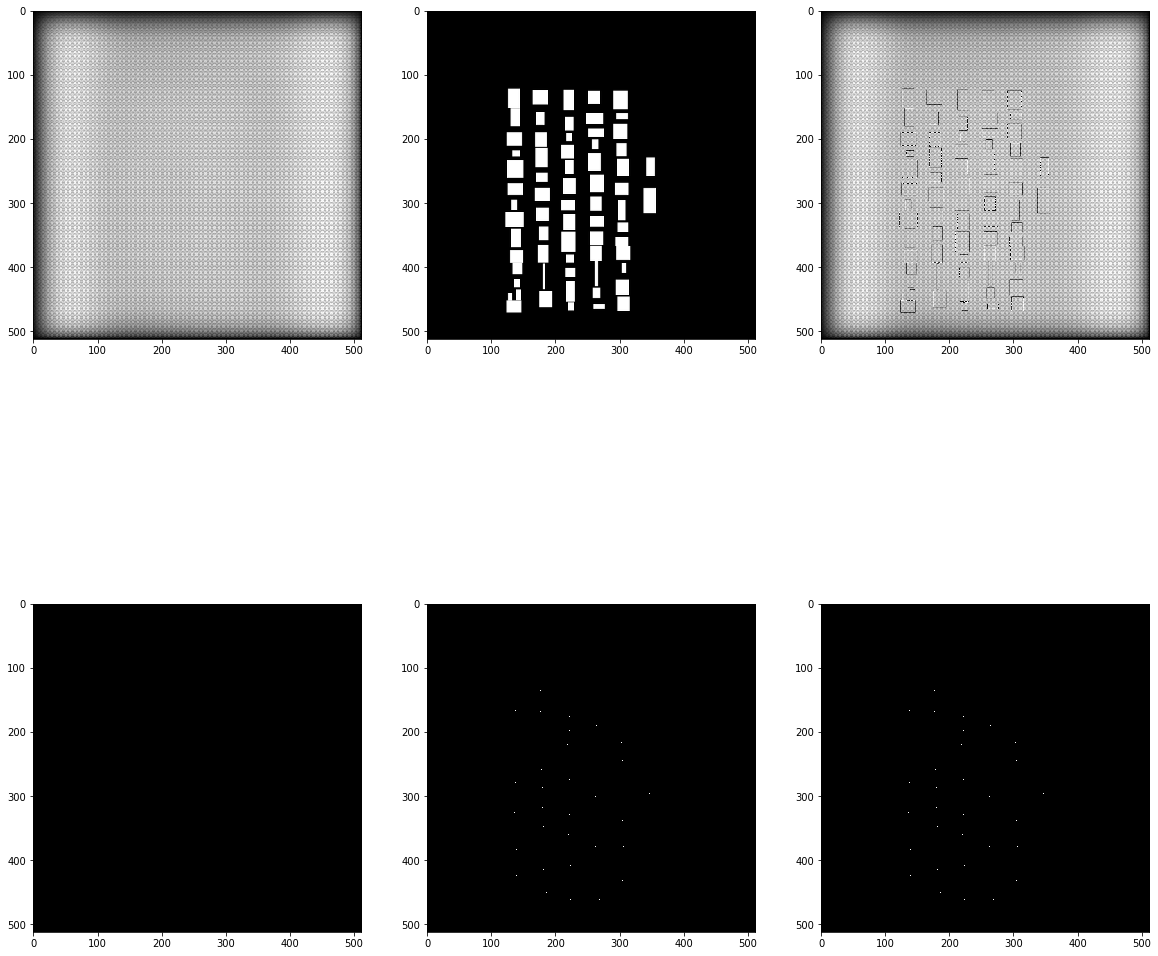

In [54]:
resultSq = np.squeeze(result)
resultInt = (255*resultSq/np.amax(resultSq)).astype(np.uint8)
diff = abs(resultInt - maps)

plt.figure(figsize=(20,20))
plt.subplot(2,3,1)
plt.imshow(resultInt[:,:,0], cmap='gist_gray')
plt.subplot(2,3,2)
plt.imshow(maps[:,:,0], cmap='gist_gray')
plt.subplot(2,3,3)
plt.imshow(diff[:,:,0], cmap='gist_gray')
plt.subplot(2,3,4)
plt.imshow(resultInt[:,:,1], cmap='gist_gray')
plt.subplot(2,3,5)
plt.imshow(maps[:,:,1], cmap='gist_gray')
plt.subplot(2,3,6)
plt.imshow(diff[:,:,1], cmap='gist_gray')


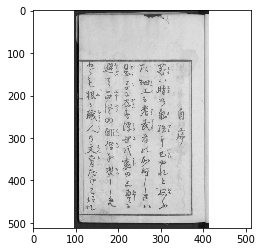

In [6]:
from PIL import Image
import matplotlib.pyplot as plt

raw = np.load(datasetRep + 'SegmentationMapsFull.npz')
image = raw['compressed_images'].copy()
maps = raw['maps'].copy()
del raw

test2 = np.squeeze(image[0])
test2 = Image.fromarray(test2,mode='L')
plt.imshow(test2, cmap='gist_gray')

In [5]:
import platform
platform.architecture()

('64bit', 'WindowsPE')

In [6]:
is_64bits = sys.maxsize > 2**32
is_64bits

True

In [7]:
import numpy as np
a = (np.random.random((4000,512,512,1))*255).astype(np.uint8).astype(np.float16)

KeyboardInterrupt: 

In [ ]:
import sys
print(sys.maxsize / 1e6)